# Time Series Forecasting
### Forecasting Store Item Sales

In [1]:
import pandas as pd
import numpy as np

import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
from pathlib import Path  
import random
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import itertools


import pickle
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# importing data
# df_train = pd.read_csv(r'C:\Users\mkhan\OneDrive\Documents\Predictive Analytics\final_project\train.csv')
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [4]:
# test_df= pd.read_csv(r'C:\Users\mkhan\OneDrive\Documents\Predictive Analytics\final_project\test.csv')
test_df= pd.read_csv('test.csv')
test_df.head()

id        date  store  item
0   0  2018-01-01      1     1
1   1  2018-01-02      1     1
2   2  2018-01-03      1     1
3   3  2018-01-04      1     1
4   4  2018-01-05      1     1

In [5]:
test_df['date'].min(), test_df['date'].max()

('2018-01-01', '2018-03-31')

In [6]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['item'] = df_train['item'].astype(str)
df_train['store'] = df_train['store'].astype(str)

In [7]:
# printing snapshot of data
df_train.head()

date store item  sales
0 2013-01-01     1    1     13
1 2013-01-02     1    1     11
2 2013-01-03     1    1     14
3 2013-01-04     1    1     13
4 2013-01-05     1    1     10

In [8]:
# Unique elements
df_train.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [9]:
# Minimum and Maximum dates
df_train['date'].min(), df_train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [10]:
# Distribution of store, item and sales
df_train.describe()

sales
count  913000.000000
mean       52.250287
std        28.801144
min         0.000000
25%        30.000000
50%        47.000000
75%        70.000000
max       231.000000

# Sales by Store and Item

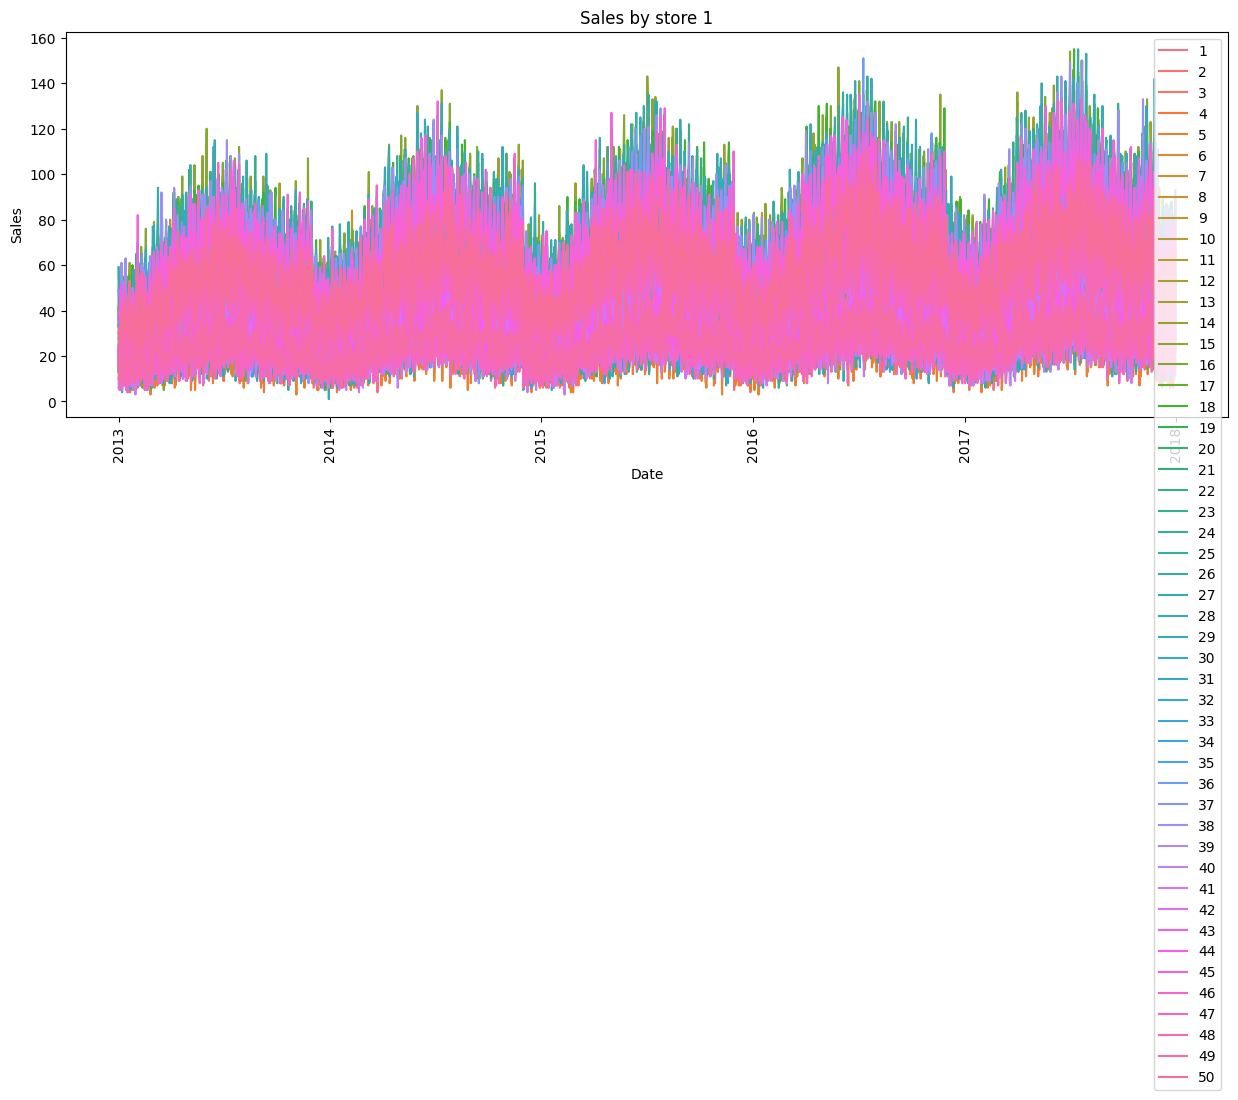

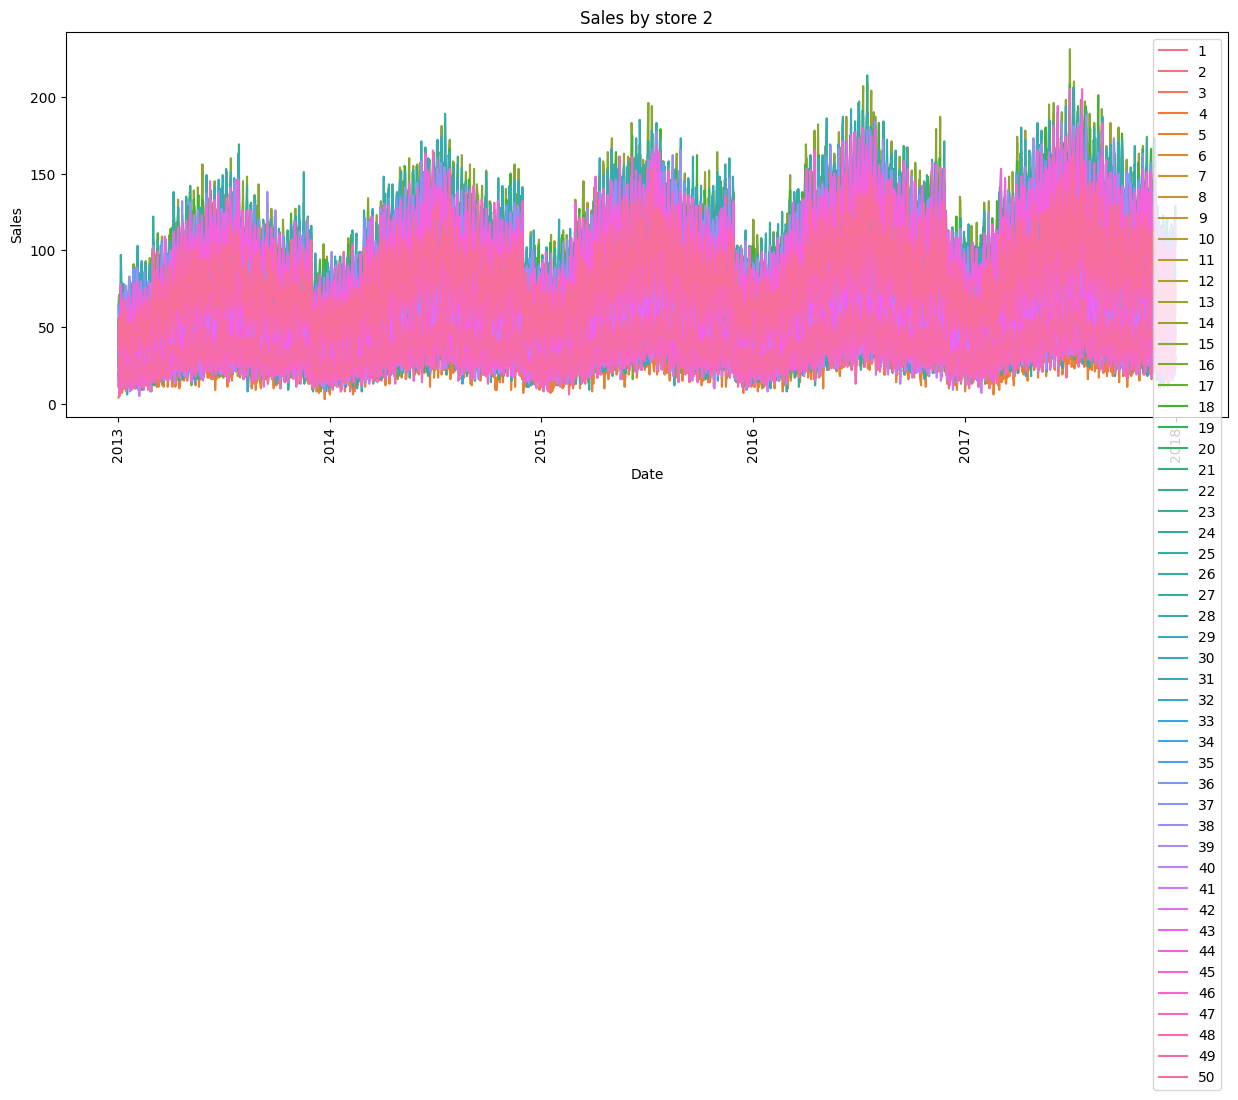

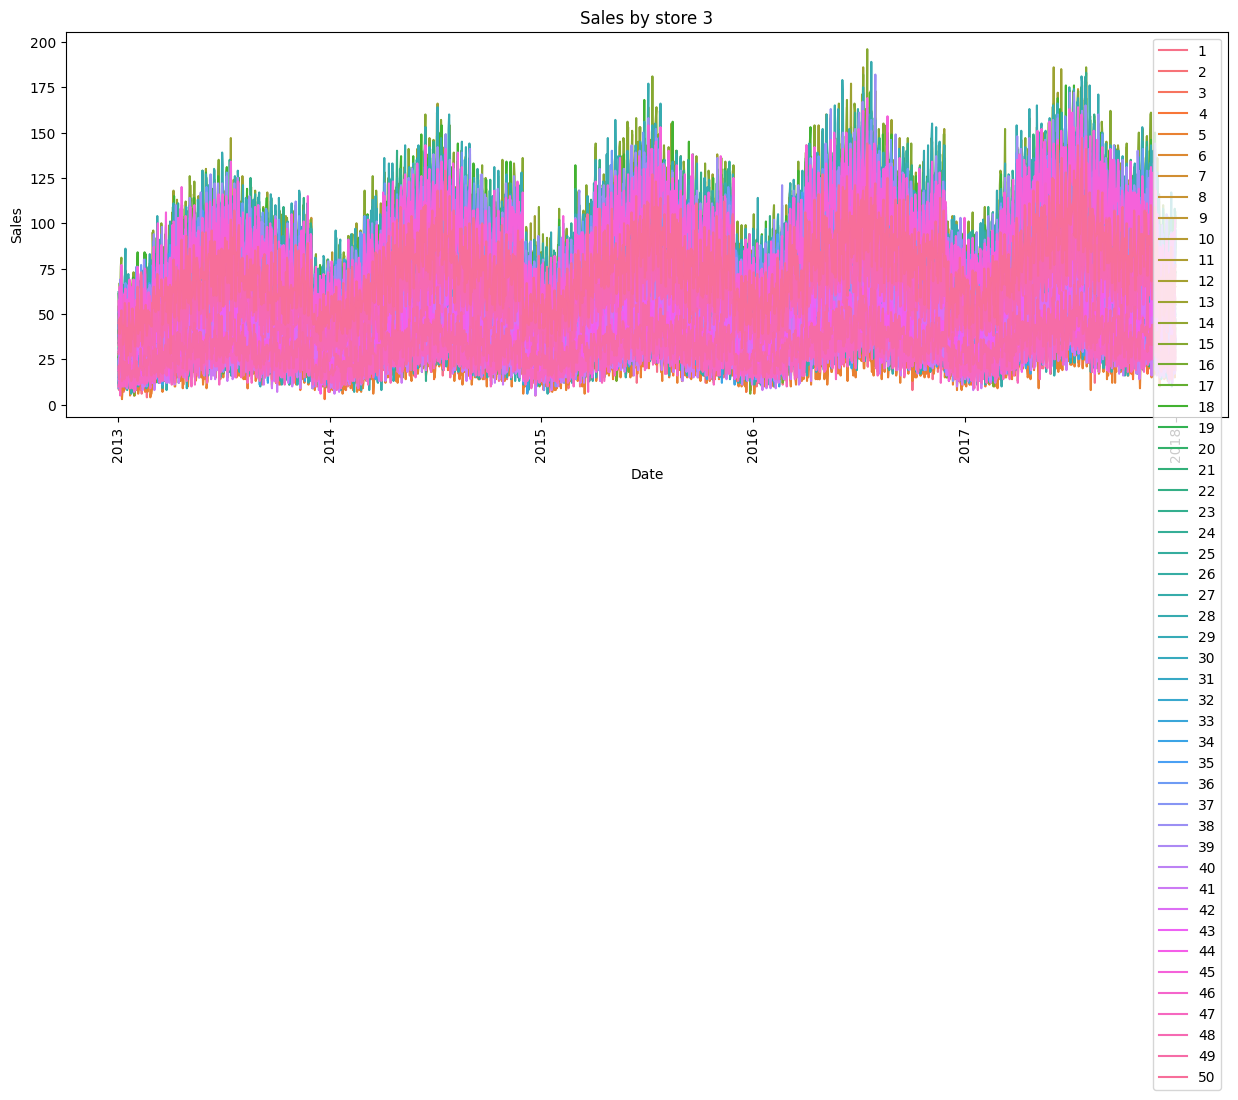

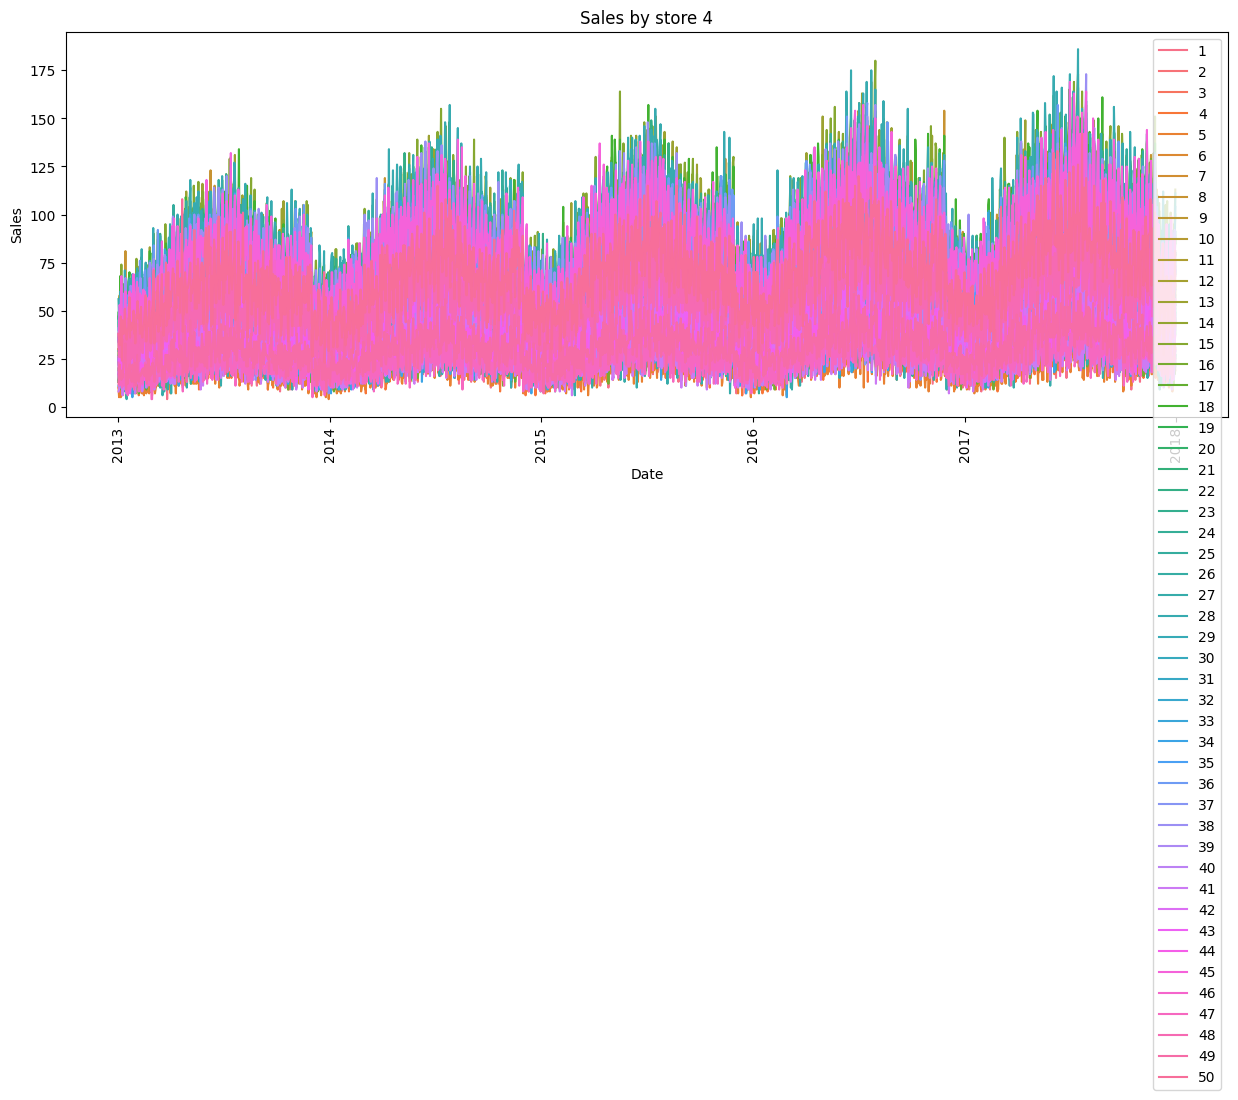

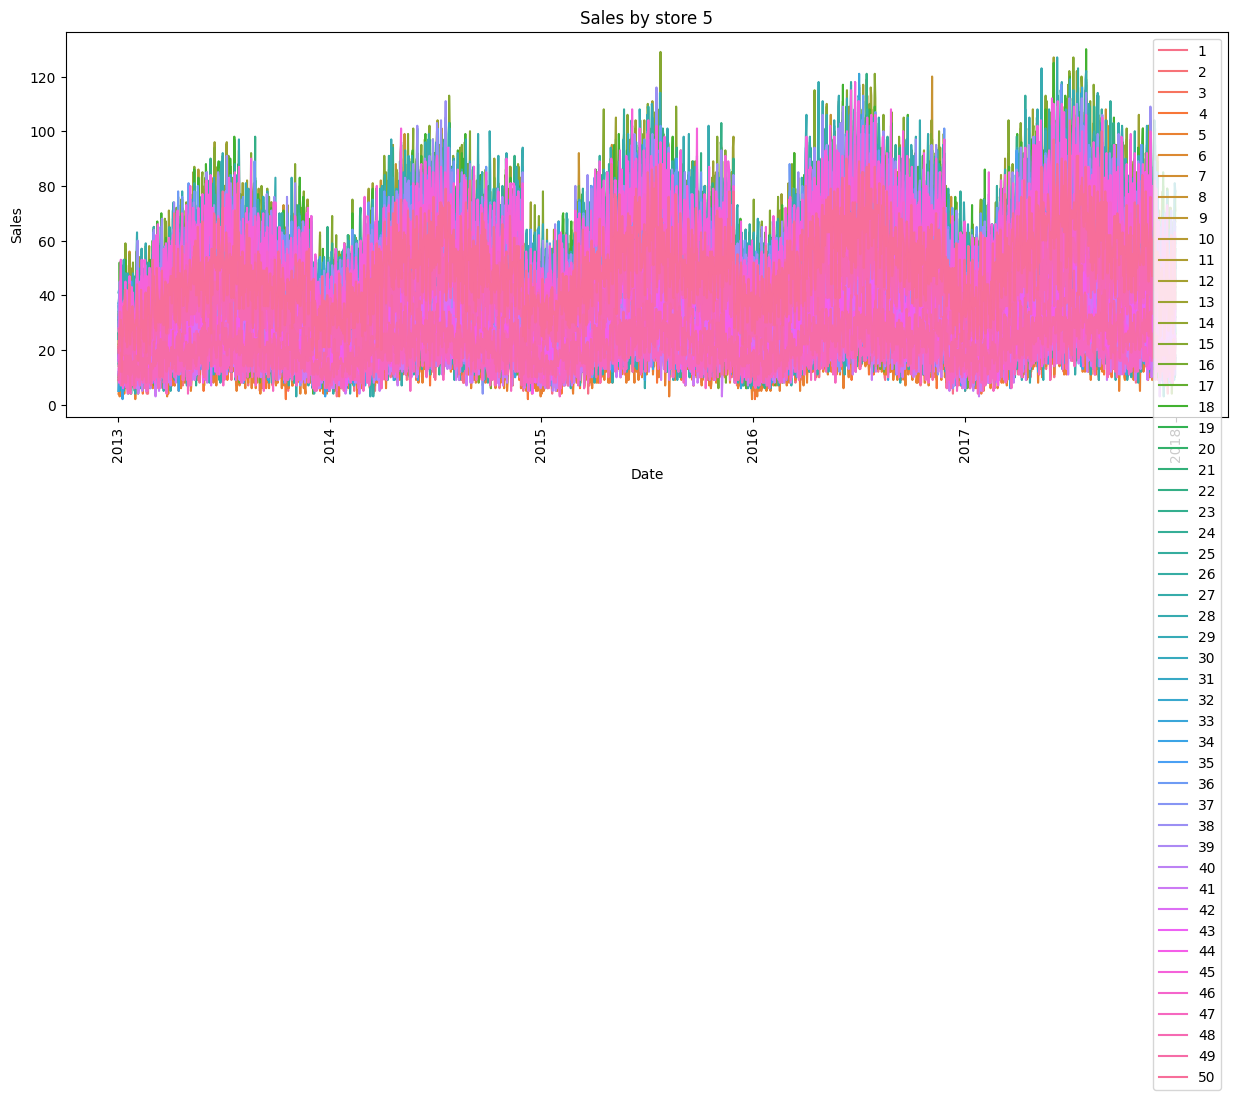

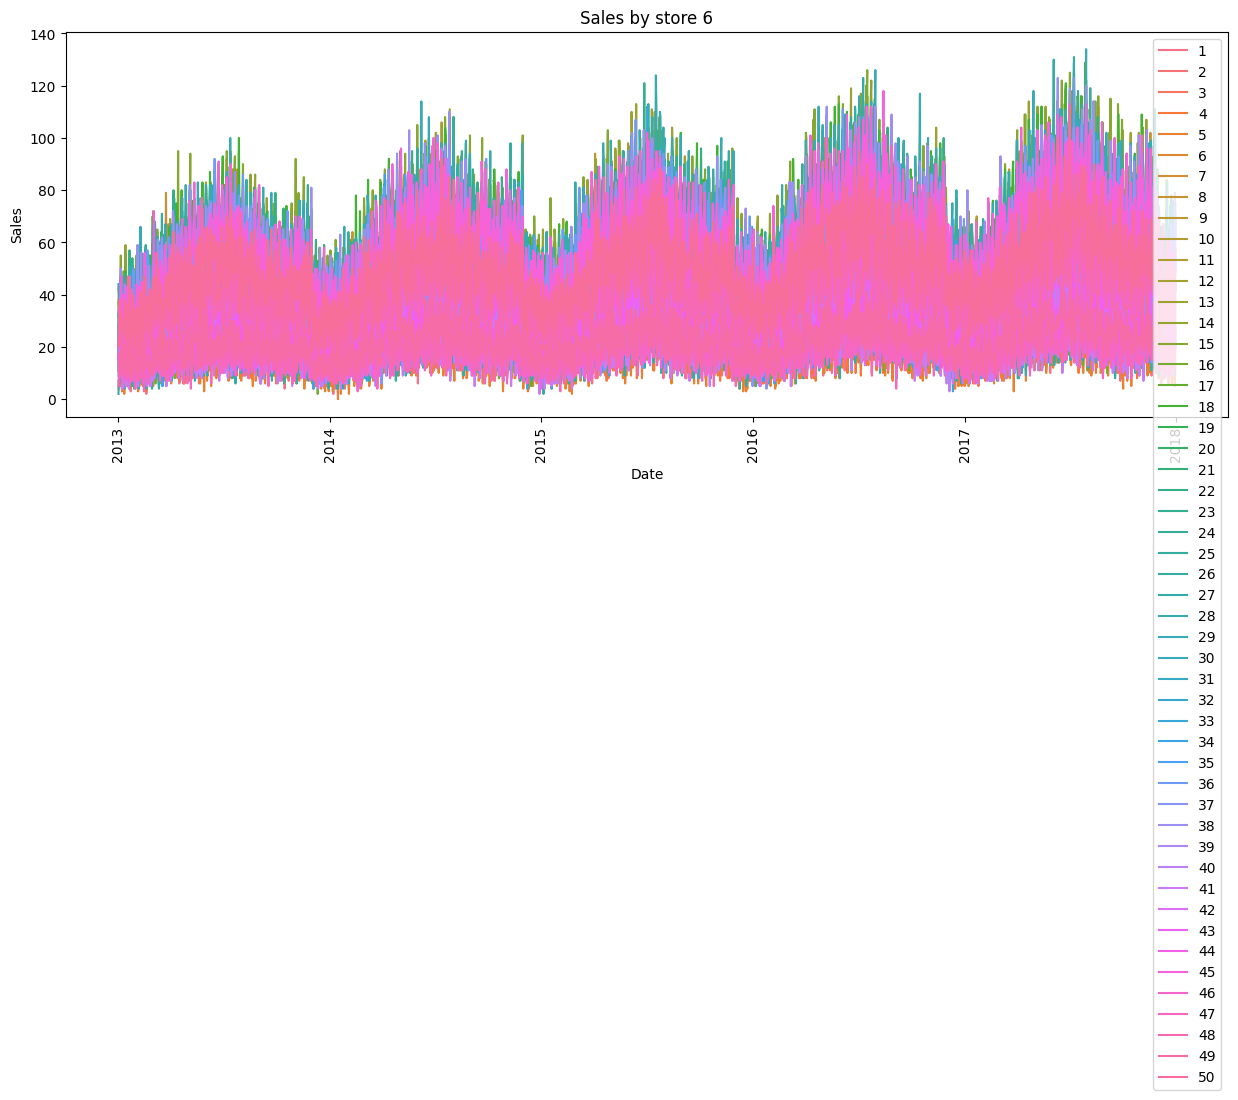

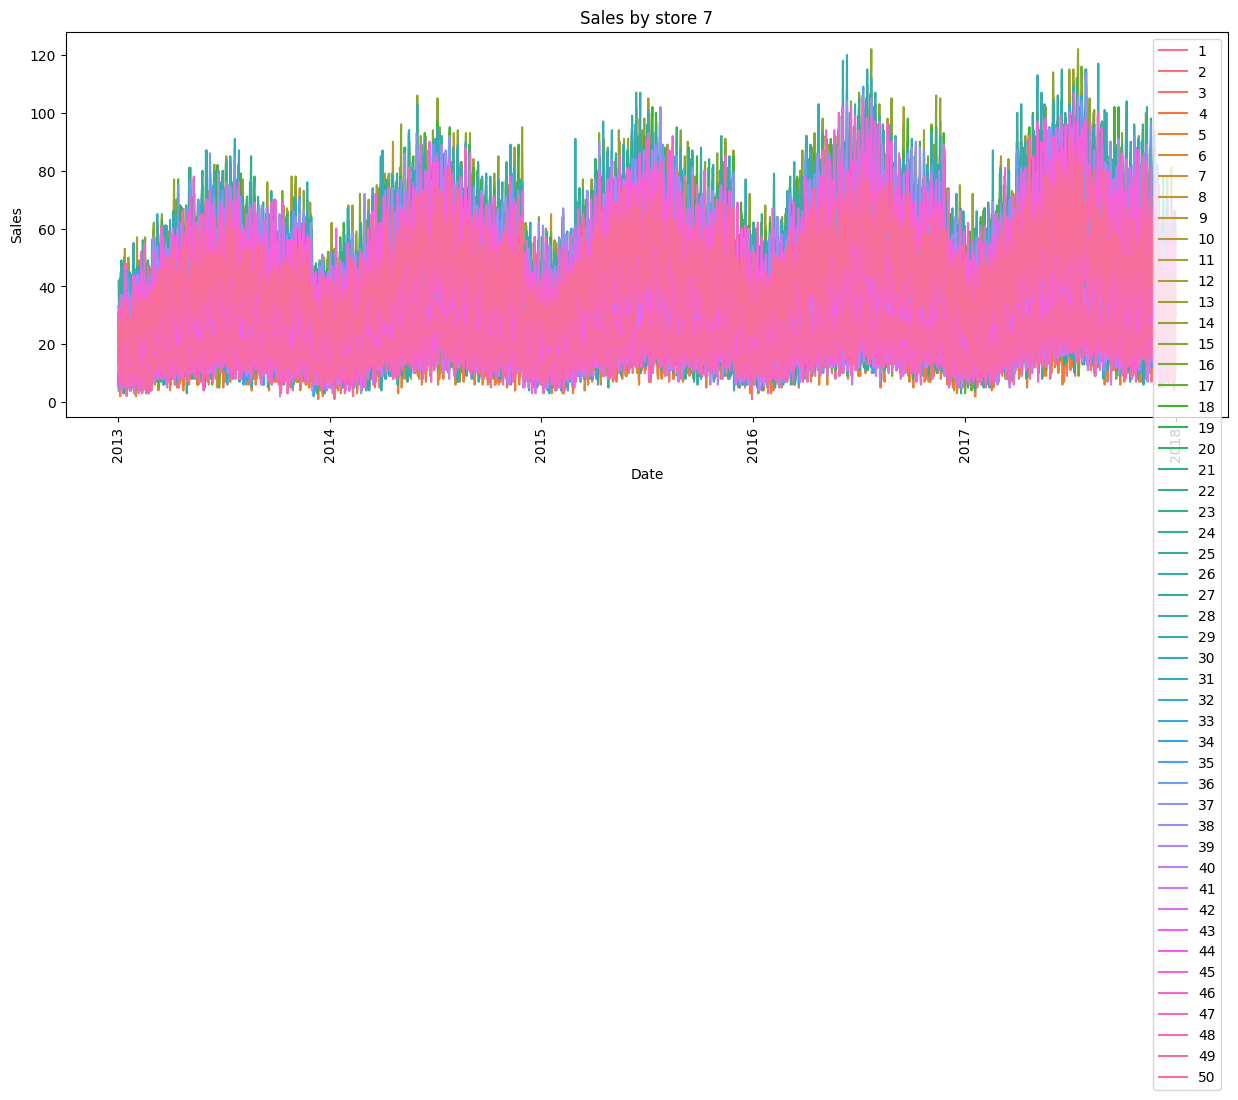

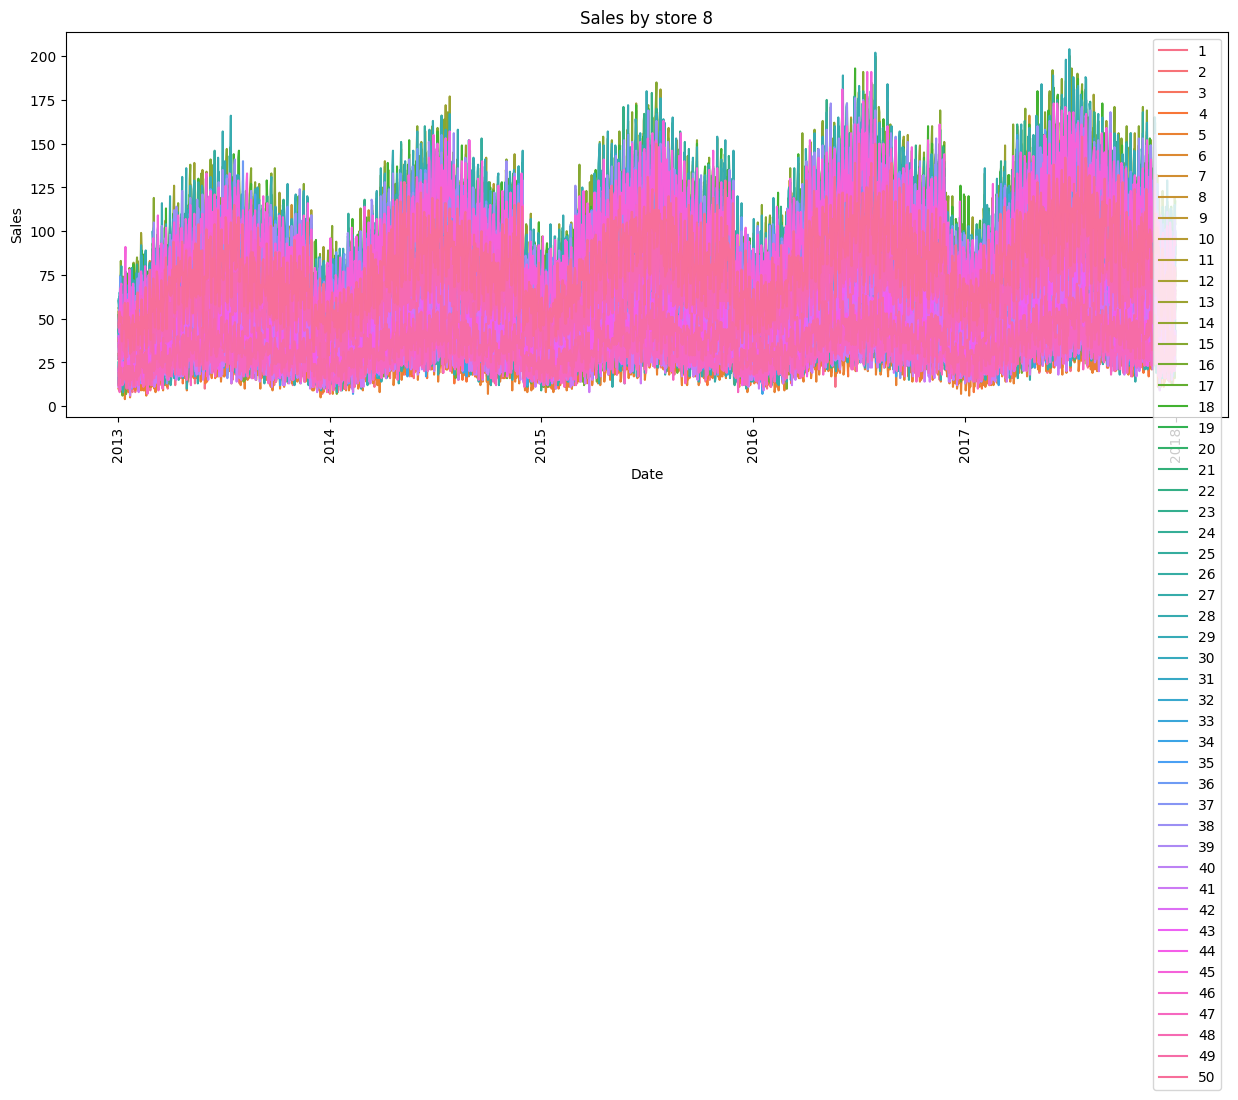

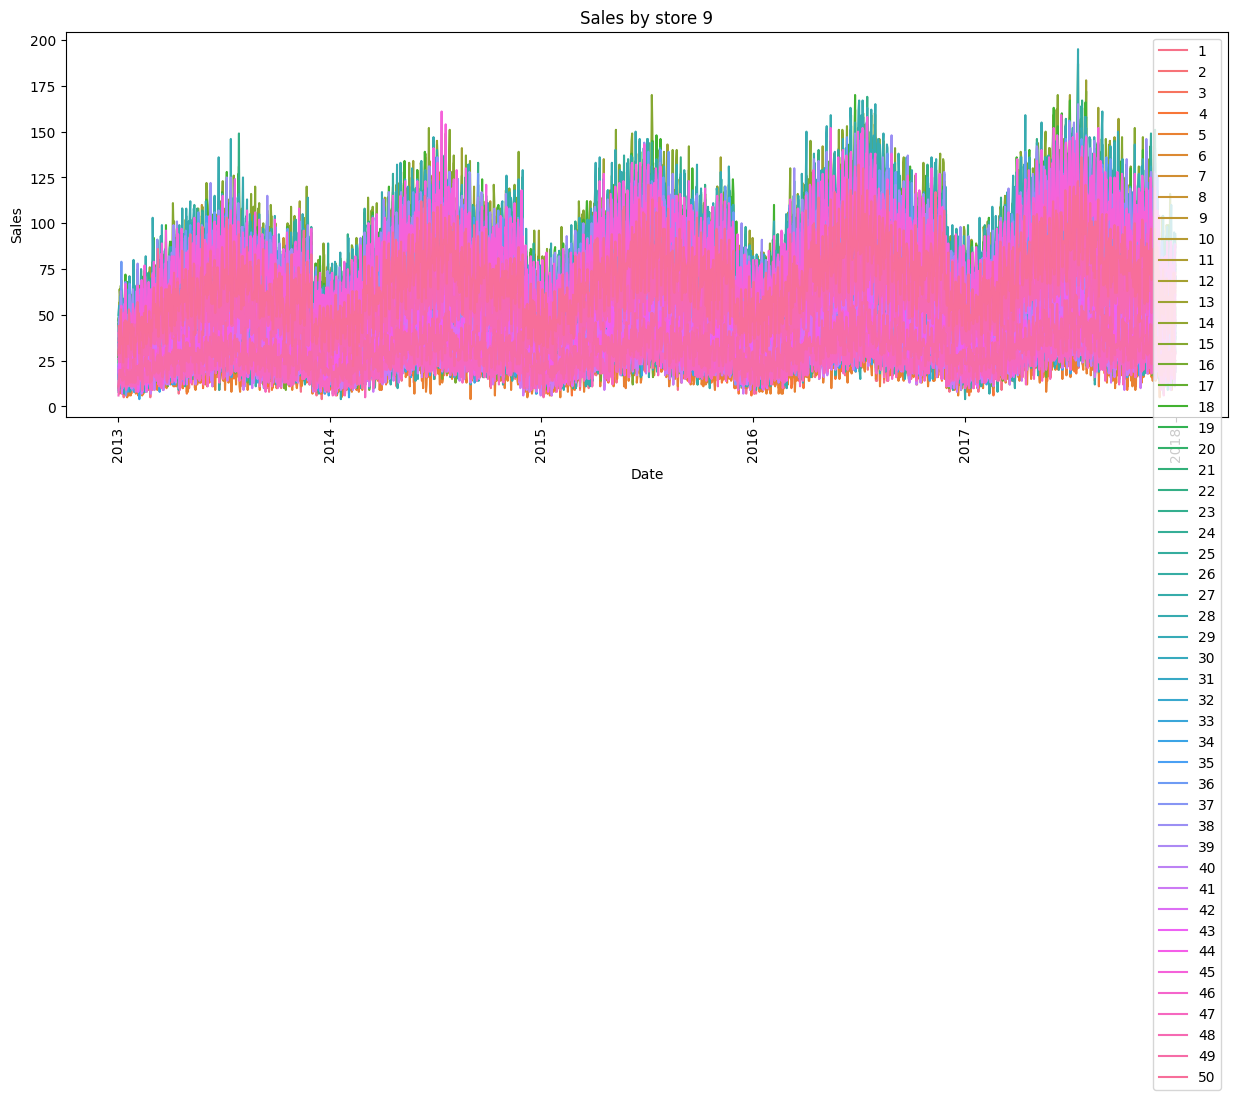

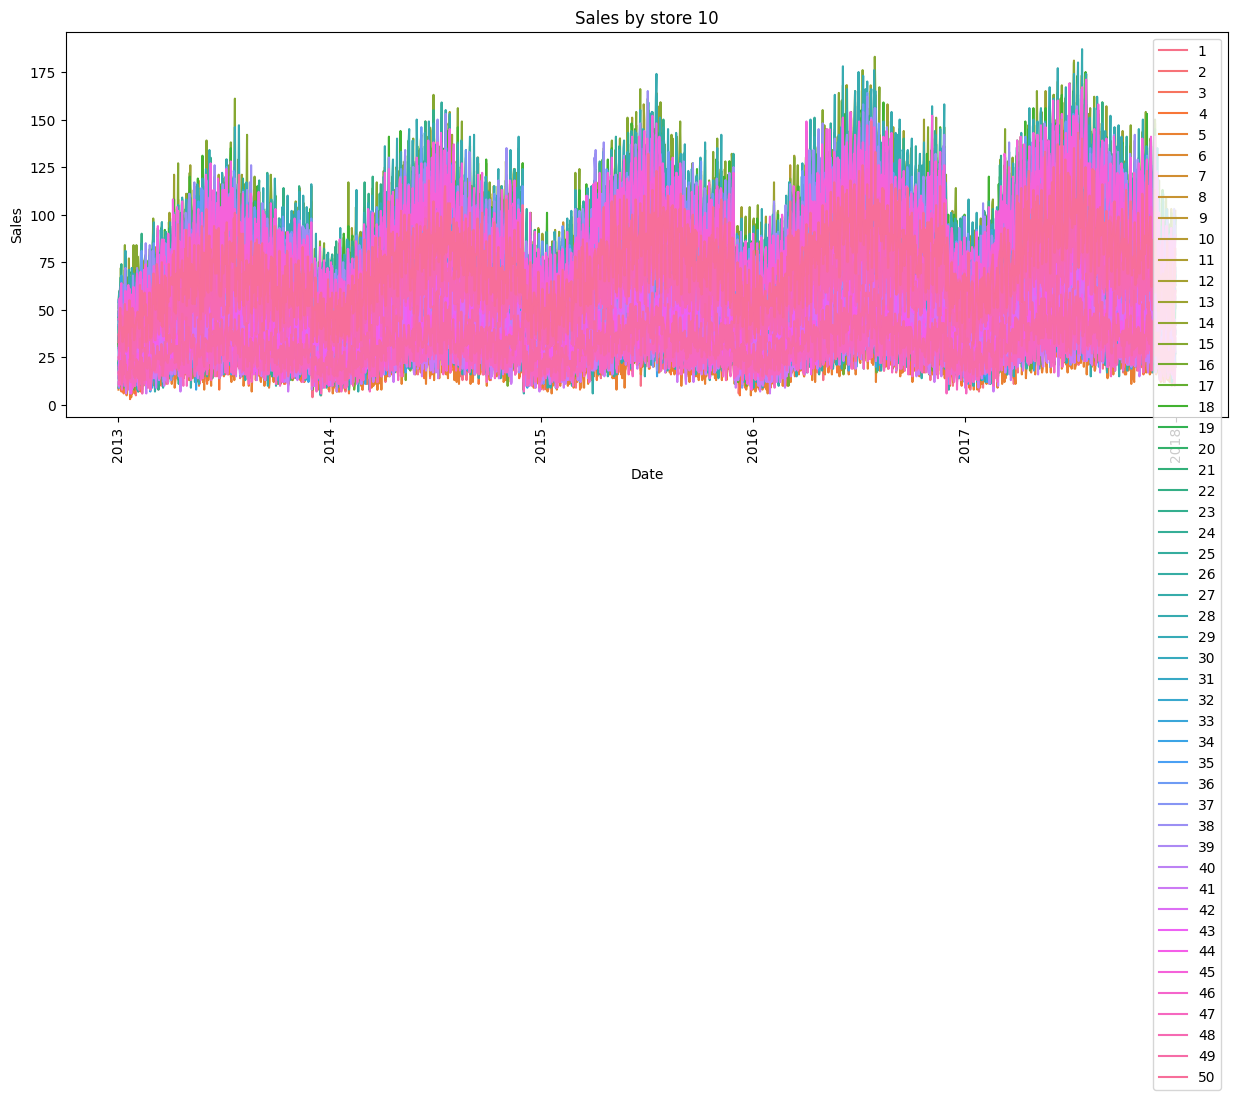

In [11]:
# getting unique items and stores
for store in df_train['store'].unique() :
    df_temp = df_train[df_train['store'] == store]
    
    plt.figure(figsize = [15, 5])
    plt.title(f'Sales by store {store}')
    sns.lineplot(x = 'date', 
                 y = 'sales',
                 hue = 'item',
                 data = df_temp)
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Sales by Item

In [12]:
# Plotting Item Daily Sales
df = df_train.groupby(['date', 'item'])['sales'].sum().reset_index()
df.head()

date item  sales
0 2013-01-01    1    133
1 2013-01-01   10    378
2 2013-01-01   11    369
3 2013-01-01   12    369
4 2013-01-01   13    444

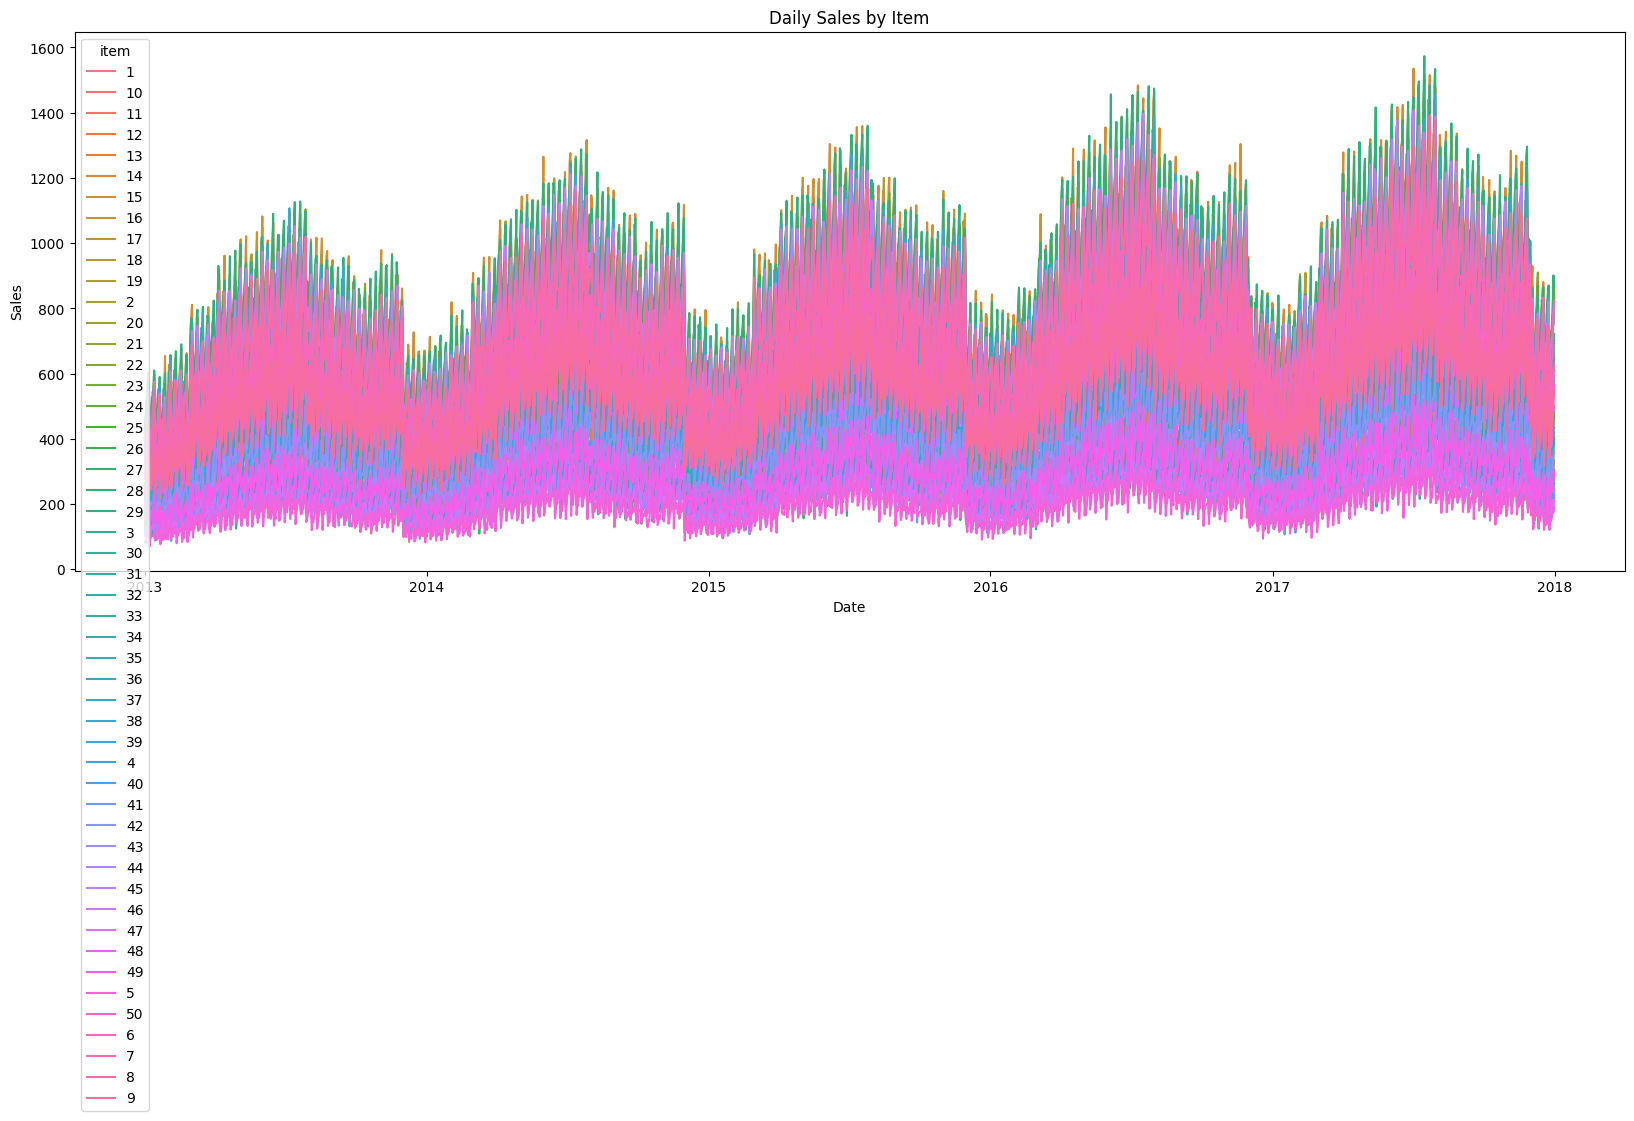

In [13]:
plt.figure(figsize = [20, 7])
sns.lineplot(x='date', y='sales', hue='item', data=df)
plt.title('Daily Sales by Item')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='item', loc='upper left')

# Sales by Store

In [14]:
# Plotting Item Daily Sales
df = df_train.groupby(['date', 'store'])['sales'].sum().reset_index()
df.head()

date store  sales
0 2013-01-01     1   1316
1 2013-01-01    10   1521
2 2013-01-01     2   1742
3 2013-01-01     3   1588
4 2013-01-01     4   1423

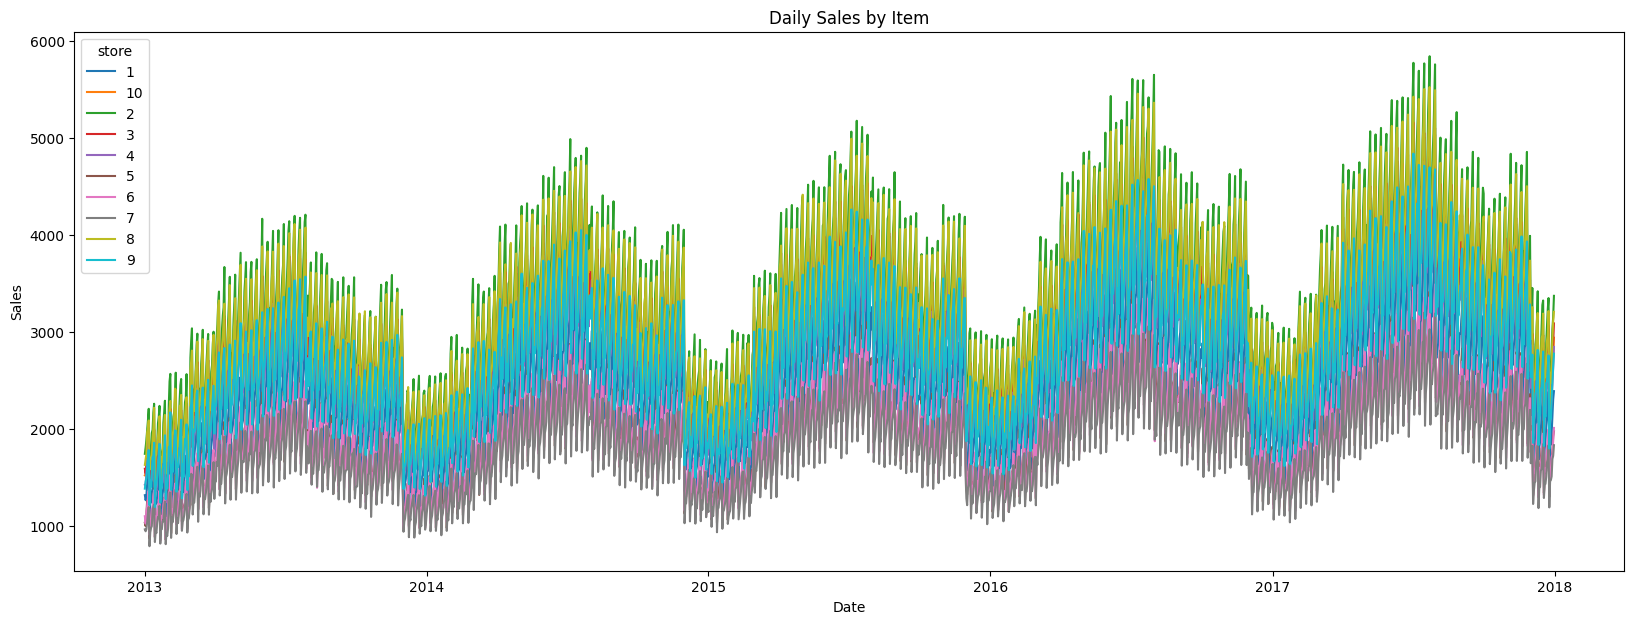

In [15]:
plt.figure(figsize = [20, 7])
sns.lineplot(x='date', y='sales', hue='store', data=df)
plt.title('Daily Sales by Item')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='store', loc='upper left')

# Tranforming data

In [16]:
print(df_train.shape)
df_train.head()

(913000, 4)


date store item  sales
0 2013-01-01     1    1     13
1 2013-01-02     1    1     11
2 2013-01-03     1    1     14
3 2013-01-04     1    1     13
4 2013-01-05     1    1     10

In [17]:
# train = pd.read_csv('train.csv')
train = df_train.copy()
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")

train.head()

date store item  sales
0 2013-01-01     1    1     13
1 2013-01-02     1    1     11
2 2013-01-03     1    1     14
3 2013-01-04     1    1     13
4 2013-01-05     1    1     10

In [18]:
train[['store', 'item']].value_counts()

store  item
1      1       1826
6      36      1826
       48      1826
       47      1826
       46      1826
               ... 
3      2       1826
       19      1826
       18      1826
       17      1826
9      9       1826
Length: 500, dtype: int64

In [19]:
# per 1 store, 1 item
train_df = train.copy()
train_df = train_df[(train_df['store']=='1') & (train_df['item']=='1')]
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.dayofyear
train_df['weekday'] = train_df['date'].dt.weekday

train_df.head()

<ipython-input-19-a53e4a087412>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['year'] = train_df['date'].dt.year
<ipython-input-19-a53e4a087412>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['month'] = train_df['date'].dt.month
<ipython-input-19-a53e4a087412>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

date store item  sales  year  month  day  weekday
0 2013-01-01     1    1     13  2013      1    1        1
1 2013-01-02     1    1     11  2013      1    2        2
2 2013-01-03     1    1     14  2013      1    3        3
3 2013-01-04     1    1     13  2013      1    4        4
4 2013-01-05     1    1     10  2013      1    5        5

# Decomposing the series
To seperate the seasonality, trend and residual. Using a function in statsmodels to find any yearly or weekly pattern present.

<Axes: xlabel='date', ylabel='sales'>

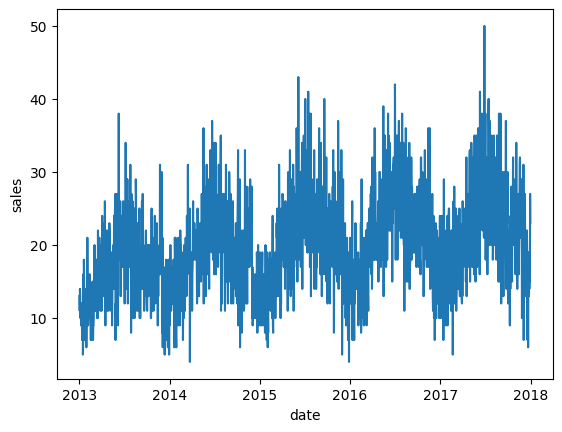

In [20]:
sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df)

<Axes: xlabel='date', ylabel='sales'>

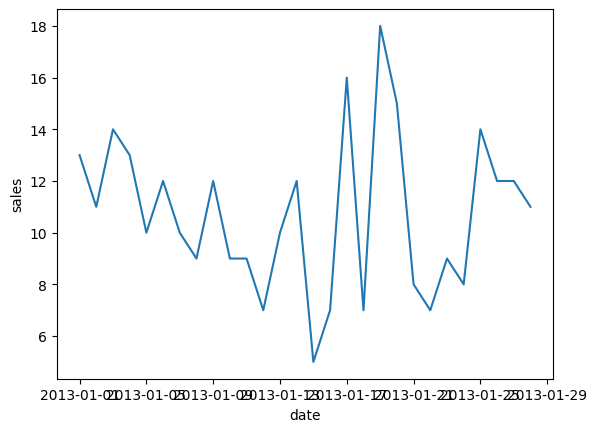

In [21]:
sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df[:28])

<Axes: xlabel='weekday', ylabel='sales'>

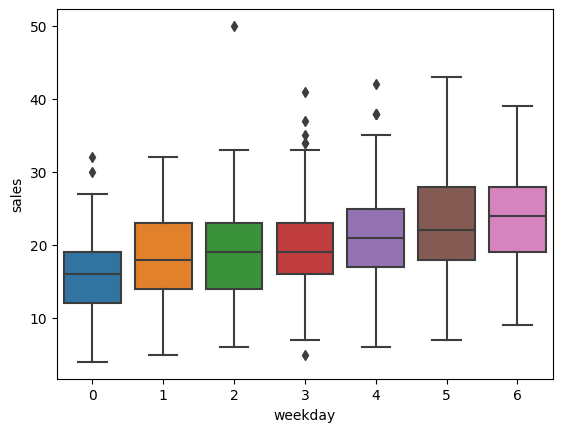

In [22]:
# 0 : Monday, 6: Sunday
# It is observed that weekends(5,6) have larger sales in comparison to weekdays. 
# There are few outliers on weekdays.
sns.boxplot(x="weekday", y="sales", data=train_df)

In [23]:
train_df = train_df.set_index('date')
train_df['sales'] = train_df['sales'].astype(float)

train_df.head()

store item  sales  year  month  day  weekday
date                                                   
2013-01-01     1    1   13.0  2013      1    1        1
2013-01-02     1    1   11.0  2013      1    2        2
2013-01-03     1    1   14.0  2013      1    3        3
2013-01-04     1    1   13.0  2013      1    4        4
2013-01-05     1    1   10.0  2013      1    5        5

# Decomposing Time Series in it's components
A yearly pattern is present, and also we can see a upwards trend, which implies data is not stationary.

<Figure size 640x480 with 0 Axes>

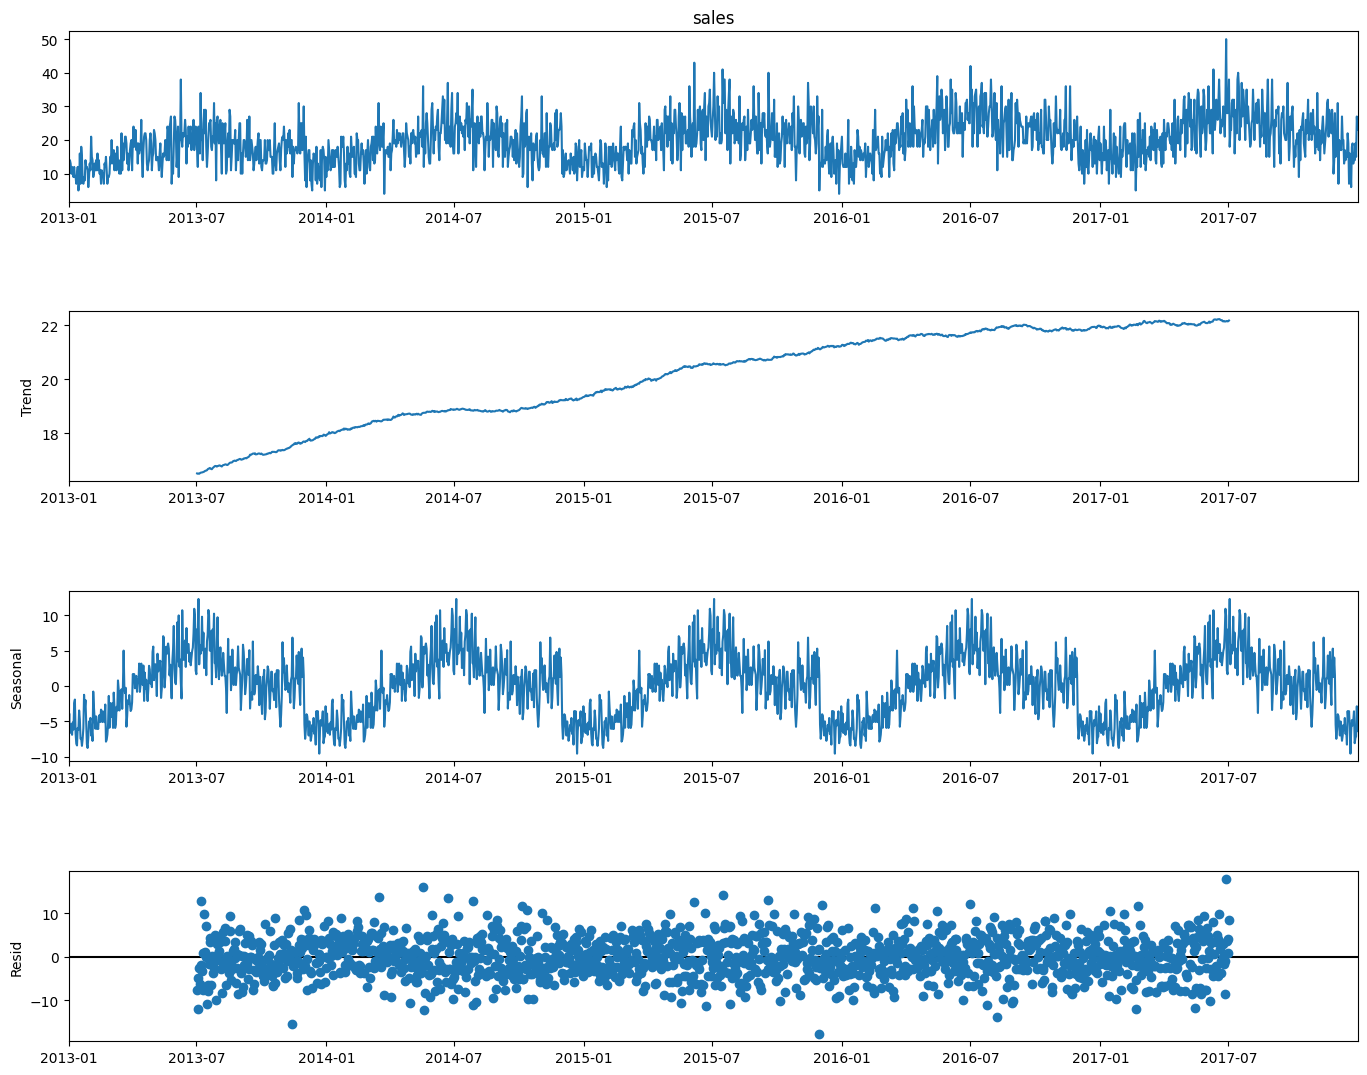

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['sales'], model='additive', period=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

# Stationarize the data

In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

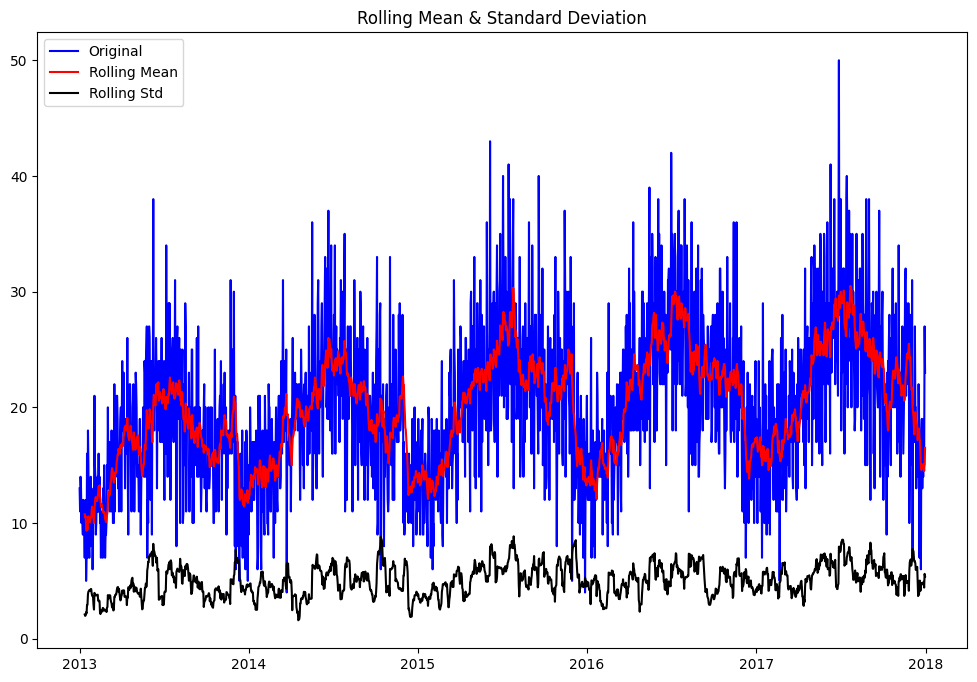

Results of Dickey-Fuller Test:
p-value = 0.0361. The series is likely non-stationary.
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [26]:
test_stationarity(train_df['sales'])

Here our p-value is 0.036. which is actually not bad, if we use a 5% Critical Value(CV), this series would be considered stationary. 
But since we observed an upward trend, we use 1% CV to be sure.

To get a stationary data, we can use log, differencing etc

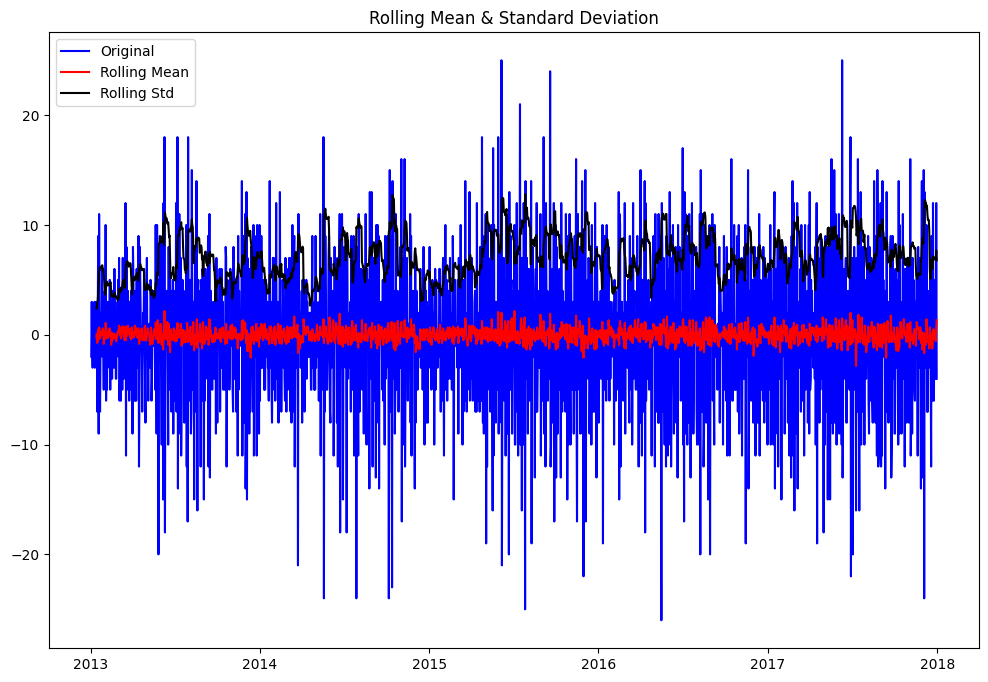

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.520810e+01
p-value                        5.705031e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [27]:
first_diff = train_df.sales - train_df.sales.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

After differencing, the p-value is extremely small. Thus this series is very likely to be stationary.

ACF & PACF

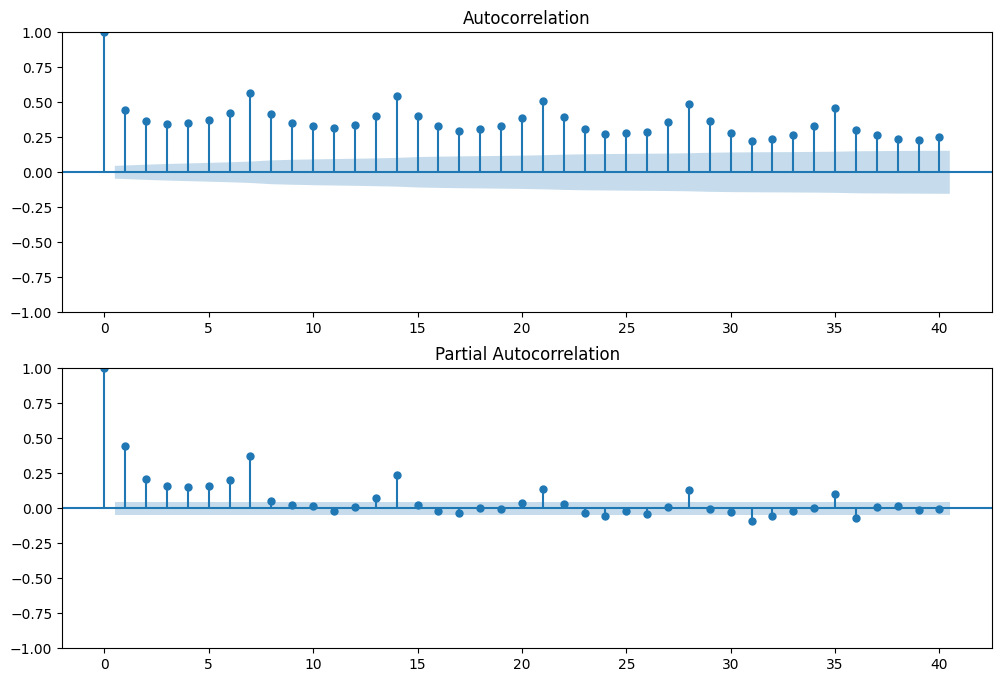

In [28]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.sales, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.sales, lags=40, ax=ax2)# , lags=40

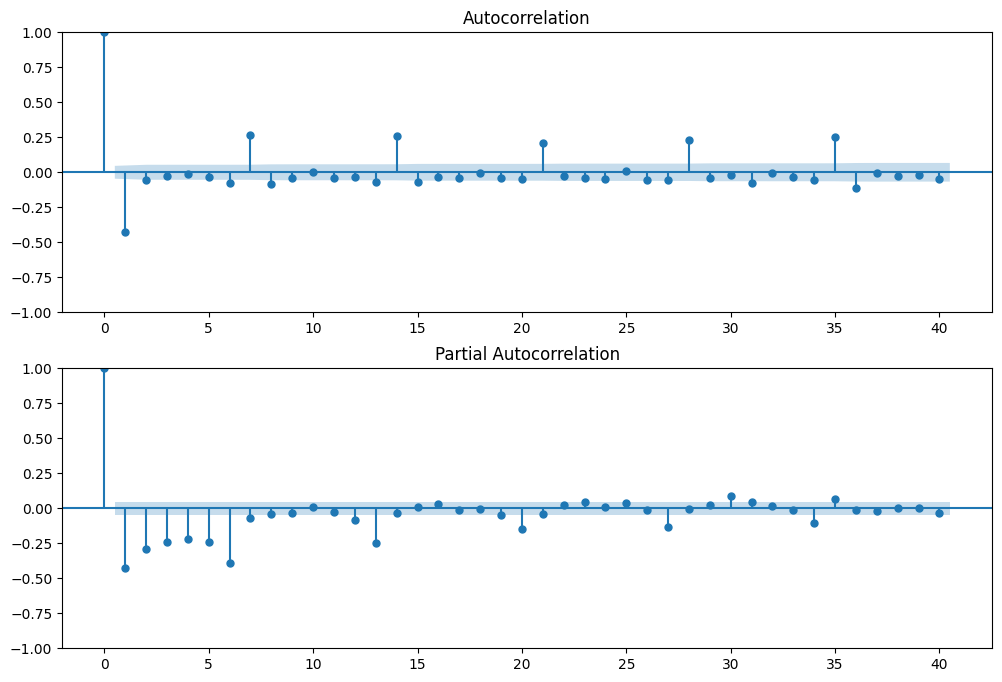

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

We can see that acf & pacf both have a recurring pattern every 7 periods. Indicating a weekly pattern. 
We can consider SARIMA to take seasonality into account.

Determining p, d, q

First order differencing make the ts stationary, I = 1
Within 6 lags the AR is significant, So AR = 6
MA = 0


# Modelling ARIMA

In [30]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima.model.ARMA',
                        FutureWarning)


arima_mod6 = ARIMA(train_df['sales'], order=(6, 1, 0)).fit()
#round(model_fit.params,2)
print(arima_mod6.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -5597.679
Date:                Sat, 22 Apr 2023   AIC                          11209.359
Time:                        01:02:41   BIC                          11247.924
Sample:                    01-01-2013   HQIC                         11223.585
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8174      0.021    -39.063      0.000      -0.858      -0.776
ar.L2         -0.7497      0.025    -30.480      0.000      -0.798      -0.702
ar.L3         -0.6900      0.026    -26.686      0.0

Analyze the result
To see the perfomance, we can plot the residual distribution.
To see if it follows normal distribution. 
And ACF, PACF has no significant terms.

NormaltestResult(statistic=16.742690147718932, pvalue=0.00023140408872260922)


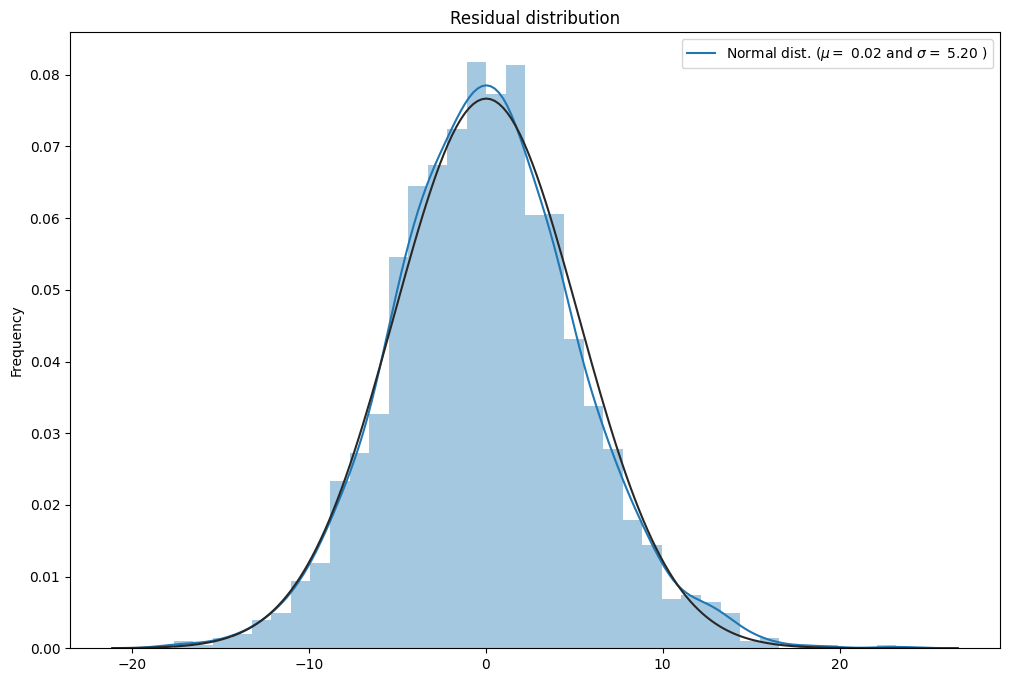

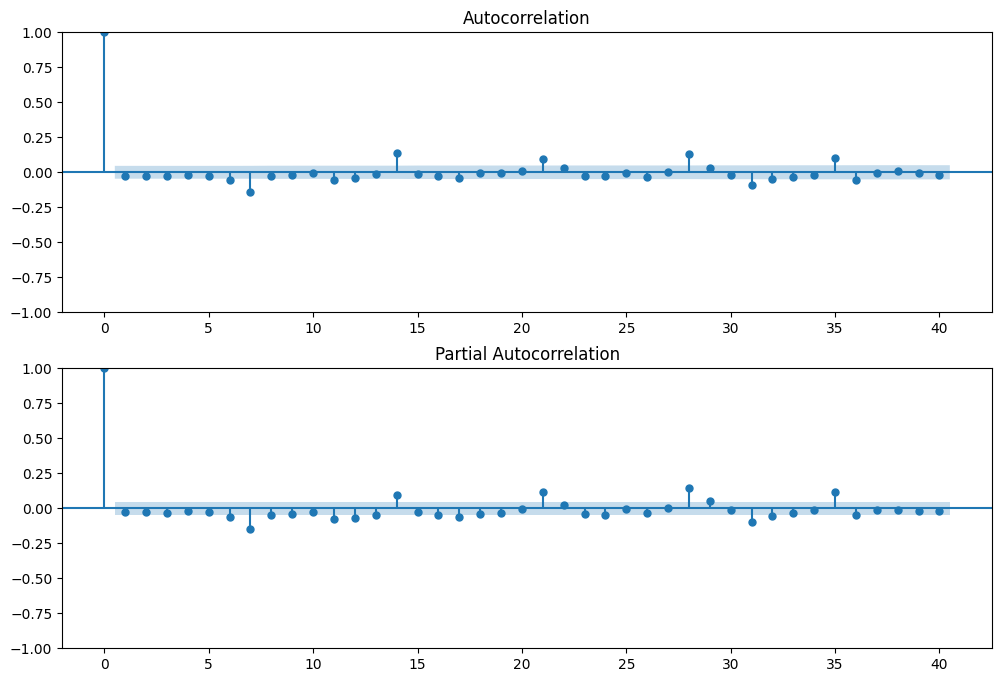

In [31]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_mod6.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)
#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

Although graph shows normal distribution, But it failed the test. 
Also we see a repeating correlation in both ACF and PACF. So we need to deal with seasonality.

## Prediction and evaluation

Taking the last 30 days in training set as validation data

<Axes: xlabel='date'>

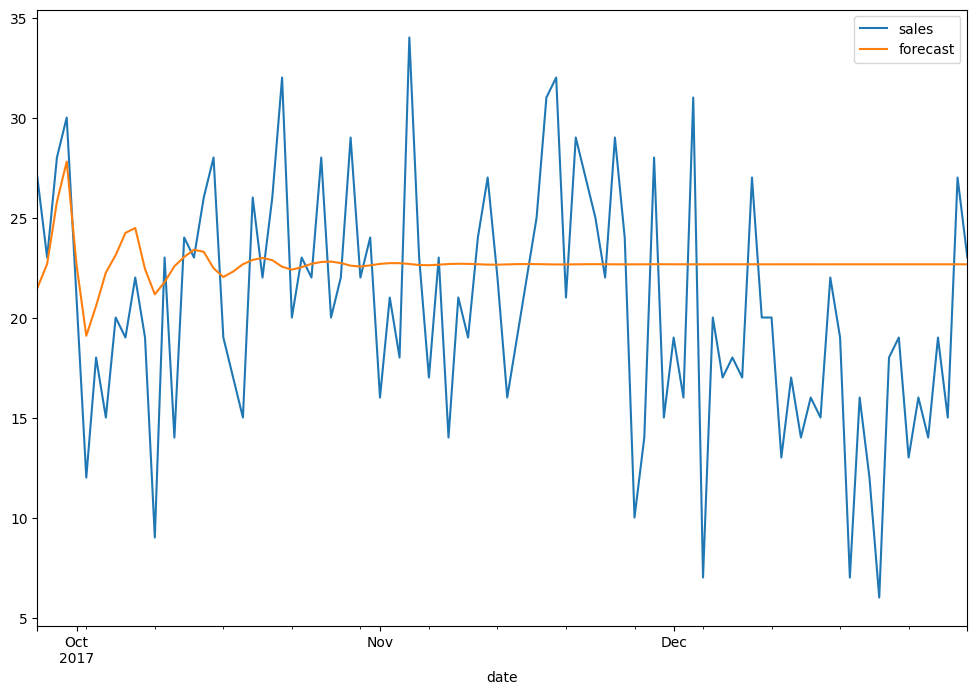

In [32]:
start_index = 1730
end_index = 1826
train_df['forecast'] = arima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))


In [33]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [34]:
smape_kun(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])

MAPE: 33.01 % 
SMAPE: 25.07 %


In [35]:
rmse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'], squared=False)
print('RMSE: %.2f' % rmse)

# calculate MSE
mse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MSE: %.2f' % mse)

# calculate MAE
mae = mean_absolute_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MAE: %.2f' % mae)

RMSE: 6.15
MSE: 37.81
MAE: 4.96


## Forecasting Next 3 months of data

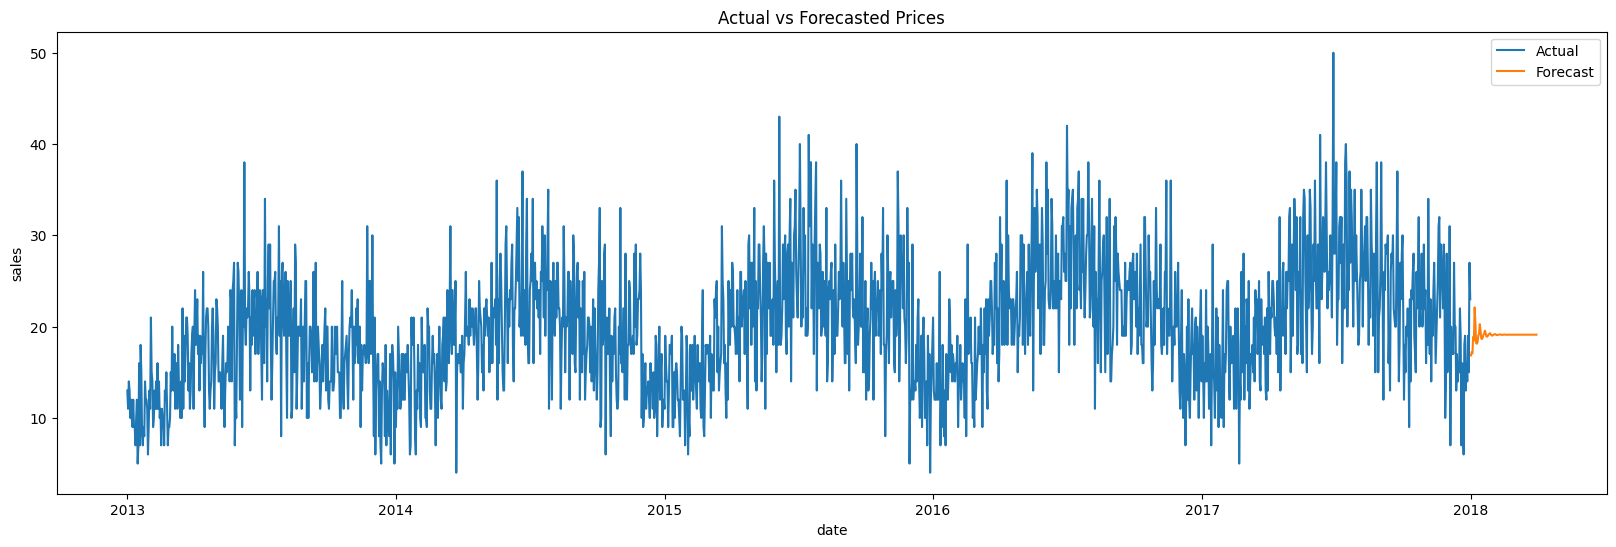

In [36]:
# Forecast prices for next 3 months
forecast = arima_mod6.forecast(steps=3*30)

# Concatenate train data and forecast
combined_data = pd.concat([train_df, forecast])

# Plot actual vs forecasted prices
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(combined_data.index, combined_data["sales"], label="Actual")
ax.plot(forecast.index, forecast, label="Forecast")
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Actual vs Forecasted Prices")
ax.legend()
plt.show()

# Modelling SARIMA

Consider seasonality affect by SARIMA

In [37]:
# sarima_mod6 = sm.tsa.statespace.SARIMAX(train_df.sales, trend='n', order=(6,1,0)).fit()
sarima_mod6 = sm.tsa.statespace.SARIMAX(train_df['sales'], order=(1, 1, 1), seasonal_order=(7, 1, 6, 12)).fit()
print(sarima_mod6.summary())

                                              SARIMAX Results                                              
Dep. Variable:                                               sales   No. Observations:                 1826
Model:             SARIMAX(1, 1, 1)x(7, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood               -5495.319
Date:                                             Sat, 22 Apr 2023   AIC                          11022.639
Time:                                                     01:12:08   BIC                          11110.682
Sample:                                                 01-01-2013   HQIC                         11055.127
                                                      - 12-31-2017                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

NormaltestResult(statistic=13.640194651882004, pvalue=0.0010916146746838464)


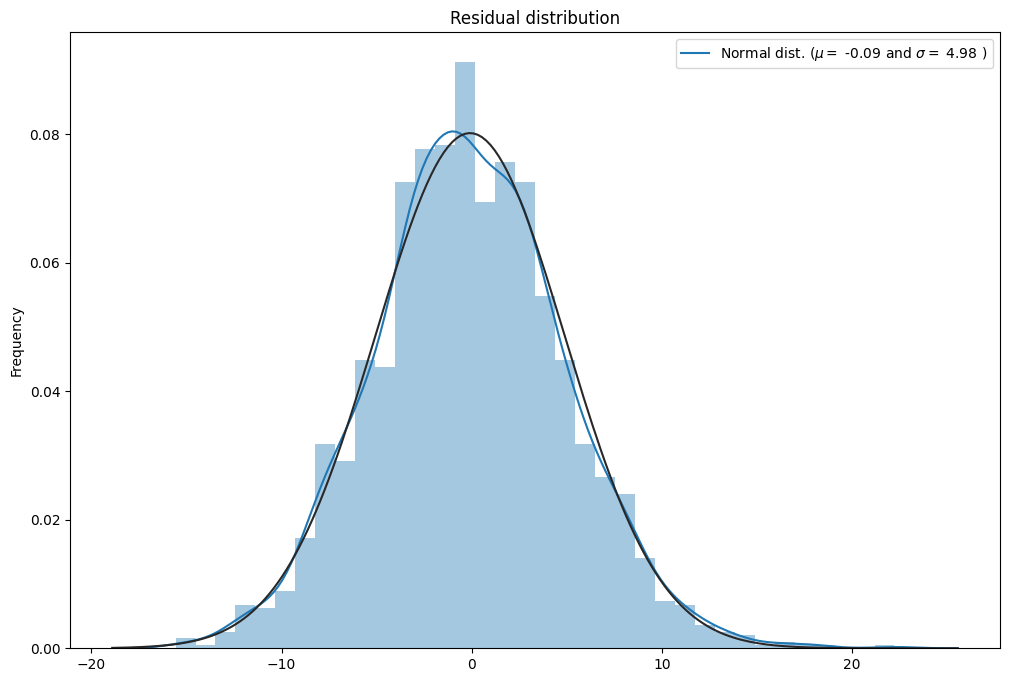

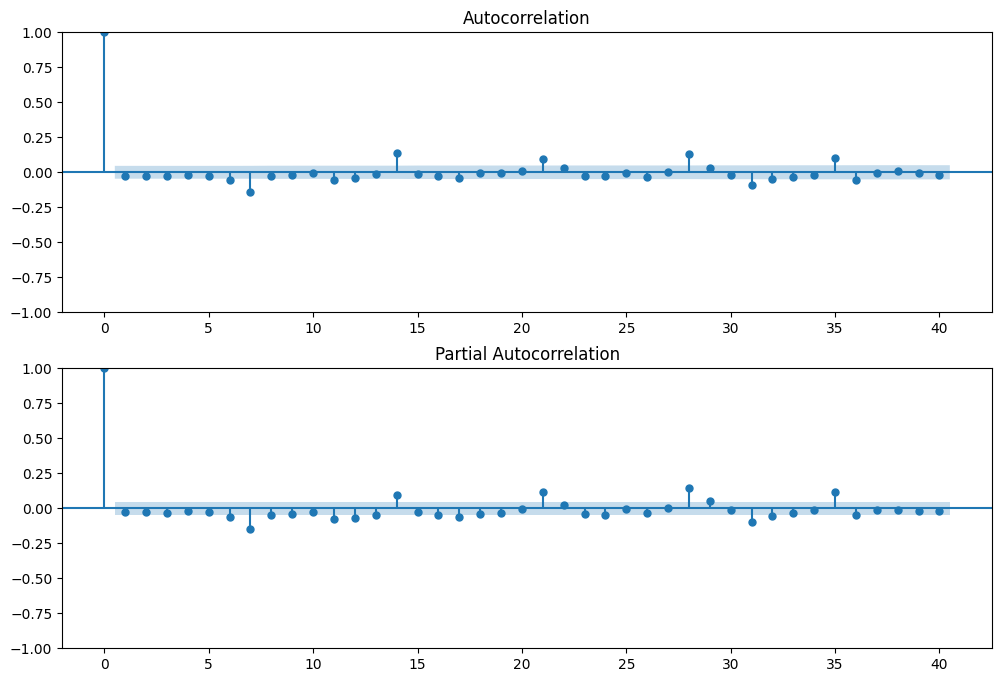

In [38]:
resid = sarima_mod6.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')
# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

## Prediction and evaluation

Taking the last 30 days in training set as validation data

<Axes: xlabel='date'>

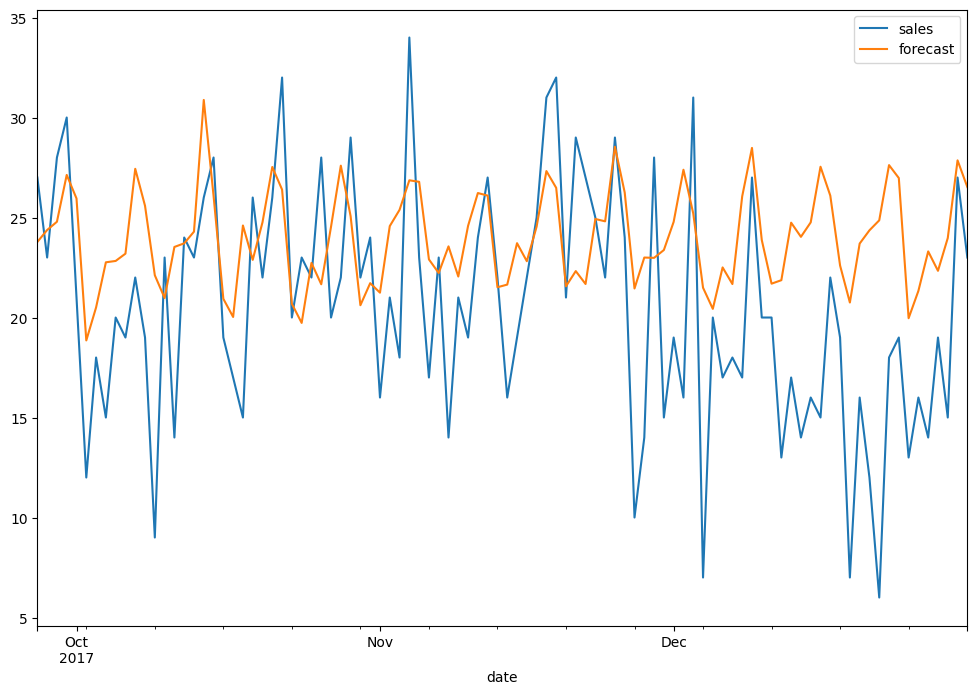

In [39]:
start_index = 1730
end_index = 1826
train_df['forecast'] = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))


In [40]:
smape_kun(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])

MAPE: 34.94 % 
SMAPE: 25.78 %


In [41]:
rmse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'], squared=False)
print('RMSE: %.2f' % rmse)

# calculate MSE
mse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MSE: %.2f' % mse)

# calculate MAE
mae = mean_absolute_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MAE: %.2f' % mae)

RMSE: 6.40
MSE: 40.93
MAE: 5.17


## Forecasting Next 3 months of data

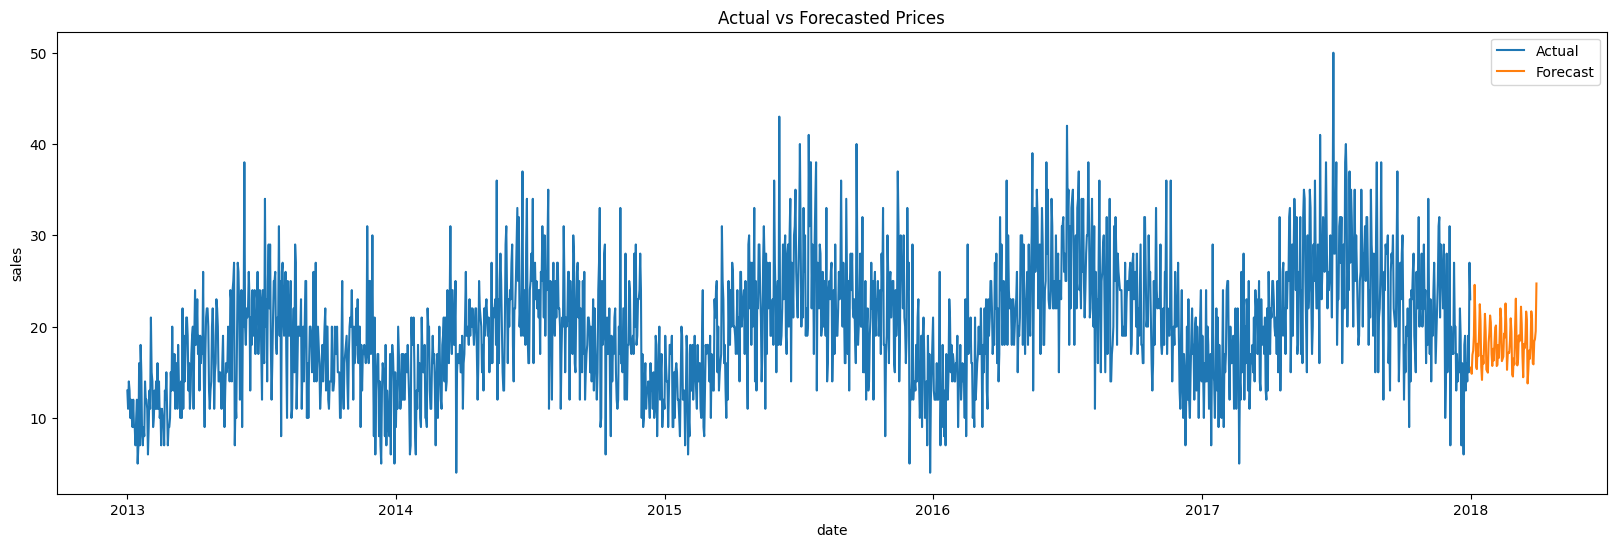

In [42]:
# Forecast prices for next 3 months
forecast = sarima_mod6.forecast(steps=3*30)

# Concatenate train data and forecast
combined_data = pd.concat([train_df, forecast])

# Plot actual vs forecasted prices
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(combined_data.index, combined_data["sales"], label="Actual")
ax.plot(forecast.index, forecast, label="Forecast")
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Actual vs Forecasted Prices")
ax.legend()
plt.show()

# Hyperparameter Tuning

## Hyperparameter Tune ARIMA

In [43]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.8 MB/s eta 0:00:00


In [44]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [45]:
# Define parameter ranges for auto-ARIMA
auto_arima_params = {
    'start_p': 0,
    'start_d': 0,
    'start_q': 0,
    'max_p': 10,
    'max_d': 5,
    'max_q': 10,
    'seasonal': False,
    'stepwise': True,
    'suppress_warnings': True,
    'error_action': 'ignore'
}

# Use auto-ARIMA to find optimal hyperparameters
optimal_model = pm.auto_arima(train_df['sales'], **auto_arima_params)

# Fit ARIMA model with selected hyperparameters
arima_model = ARIMA(train_df['sales'], order=optimal_model.order)
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -5572.990
Date:                Sat, 22 Apr 2023   AIC                          11163.980
Time:                        01:13:55   BIC                          11213.564
Sample:                    01-01-2013   HQIC                         11182.271
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0448      0.037      1.215      0.224      -0.027       0.117
ar.L2         -0.0597      0.032     -1.841      0.066      -0.123       0.004
ar.L3         -0.0665      0.032     -2.072      0.038      -0.129      -0.004
ar.L4         -0.0488      0.032     -1.508      0.131      -0.112       0.015
ar.L5         -0.0317      0.031     -1.022      0.307      -0.092       0.029
ar.L6          0.0199      0.029      0.684      0.494      -0.037       0.077
ar.L7          0.2757      0.028      9.861      0.000       0.221       0.331
ma.L1         -0.9143      0.025    -36.138      0.000      -0.964      -0.865
sigma2        26.2645      0.811     32.372      0.000      24.674      27.855
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

NormaltestResult(statistic=13.425420916365283, pvalue=0.0012153654589205209)


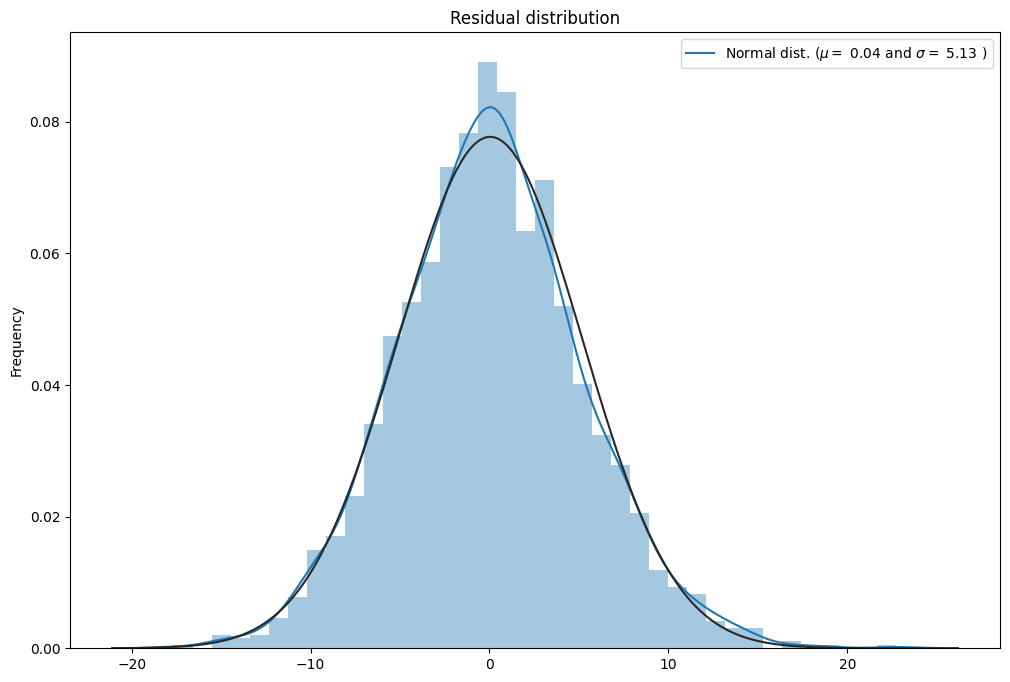

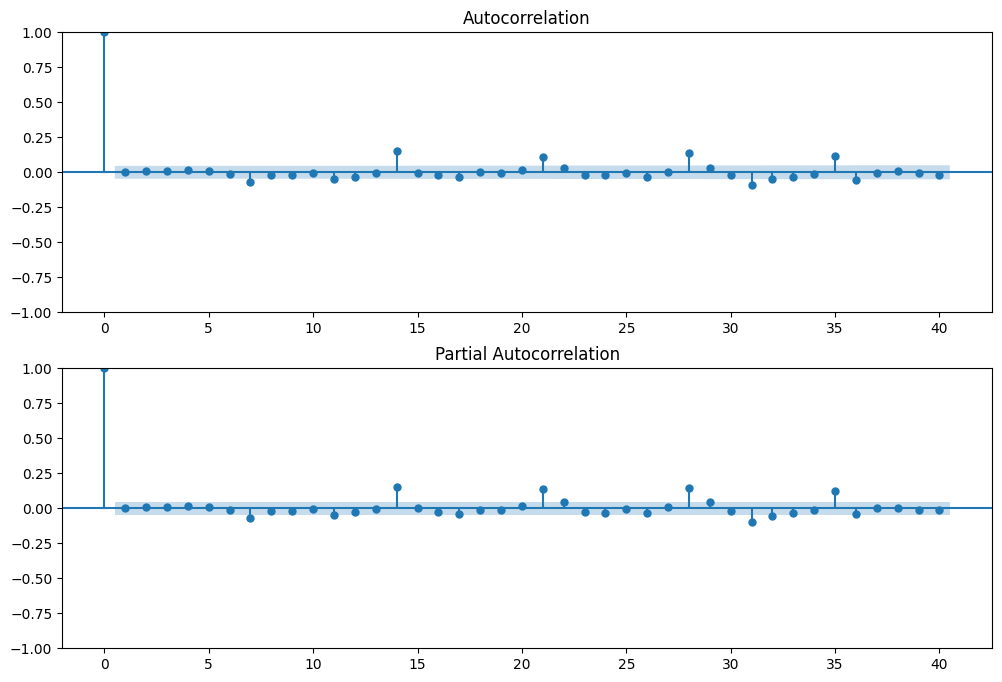

In [46]:
resid = arima_model_fit.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')
# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_model_fit.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_model_fit.resid, lags=40, ax=ax2)

### Prediction and Evaluation

<Axes: xlabel='date'>

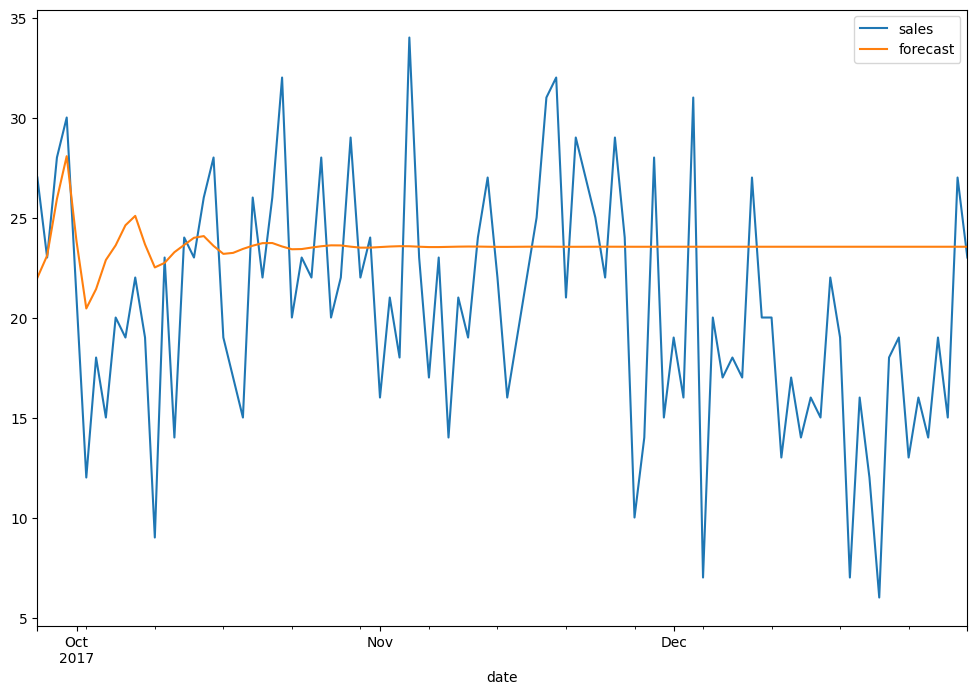

In [47]:
# Predictions
start_index = 1730
end_index = 1826
train_df['forecast'] = arima_model_fit.predict(start = start_index, end= end_index, dynamic= True)  
train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

In [48]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")
smape_kun(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])

MAPE: 35.83 % 
SMAPE: 26.46 %


In [49]:
rmse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'], squared=False)
print('RMSE: %.2f' % rmse)

# calculate MSE
mse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MSE: %.2f' % mse)

# calculate MAE
mae = mean_absolute_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MAE: %.2f' % mae)

RMSE: 6.52
MSE: 42.56
MAE: 5.30


## Hyperparameter tune SARIMAX

In [50]:
# Define parameter ranges for auto-SARIMAX
# auto_sarimax_params = {
#     'start_p': 0,
#     'start_d': 0,
#     'start_q': 0,
#     'max_p': 10,
#     'max_d': 5,
#     'max_q': 10,
#     'start_P': 0,
#     'start_D': 0,
#     'start_Q': 0,
#     'max_P': 10,
#     'max_D': 5,
#     'max_Q': 10,
#     'seasonal': True,
#     'stepwise': True,
#     'suppress_warnings': True,
#     'error_action': 'ignore'
# }

# Hyperparameter tuning using auto_arima
optimal_model = pm.auto_arima(train_df['sales'], seasonal=True, m=12, 
                           start_p=1, start_q=1, start_d = 1, max_p=2, max_q=2, max_d = 1, 
                           start_P=7, start_Q=6, start_D = 1, max_P=8, max_Q=7, max_D = 1,
                           error_action='ignore', suppress_warnings=True, 
                           stepwise=True, random_state=42, n_fits=50)


# Use auto-SARIMAX to find optimal hyperparameters
# optimal_model = pm.auto_arima(train_df.sales, exogenous=None, **auto_sarimax_params)

# Fit SARIMAX model with selected hyperparameters
sarimax_model = sm.tsa.statespace.SARIMAX(train_df.sales, order=optimal_model.order, seasonal_order=optimal_model.seasonal_order, exog=None)
sarimax_model_fit = sarimax_model.fit()

In [51]:
sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                 1826
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -5647.306
Date:                             Sat, 22 Apr 2023   AIC                          11306.613
Time:                                     01:27:55   BIC                          11339.669
Sample:                                 01-01-2013   HQIC                         11318.807
                                      - 12-31-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0327      0.027      1.232      0.218      -0.019       0.085
ar.L2         -0.0722      0.026     -2.831      0.005      -0.122      -0.022
ma.L1         -0.8988      0.013    -69.966      0.000      -0.924      -0.874
ar.S.L12      -0.0617      0.023     -2.645      0.008      -0.108      -0.016
ar.S.L24      -0.1201      0.024     -5.096      0.000      -0.166      -0.074
sigma2        28.4964      0.872     32.696      0.000      26.788      30.205
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                16.13
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

NormaltestResult(statistic=13.917196665537606, pvalue=0.0009504278248756773)


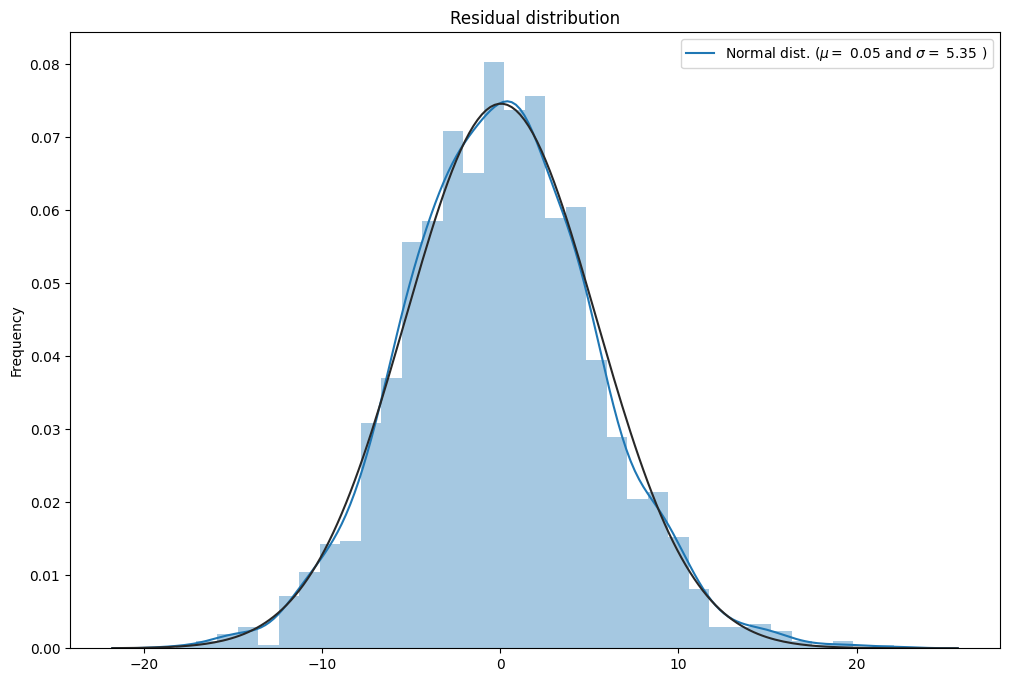

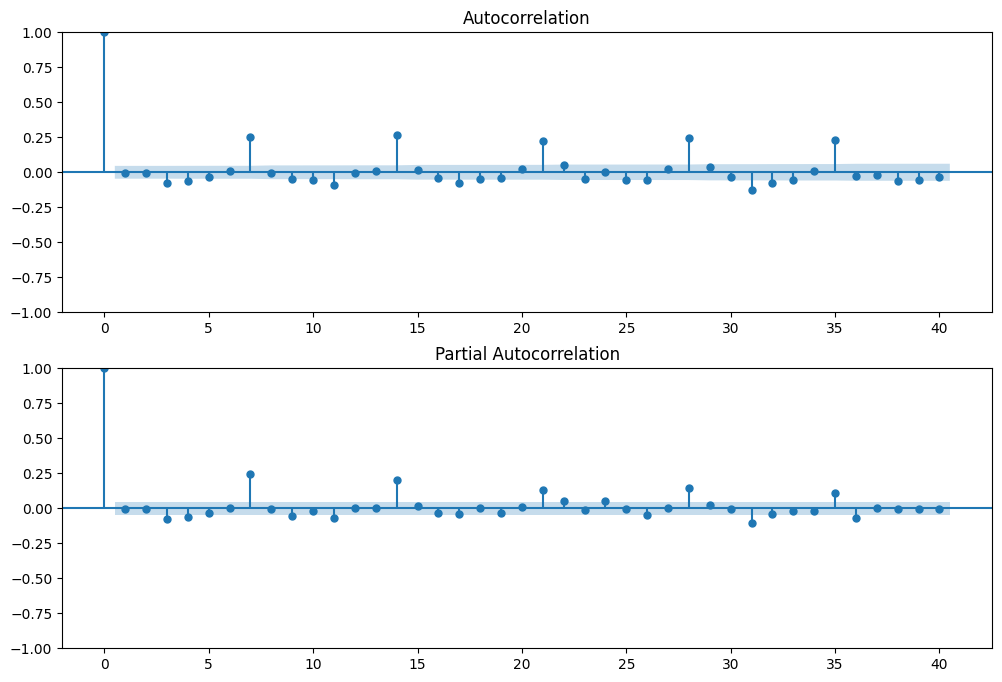

In [52]:
from scipy import stats
from scipy.stats import normaltest

resid = sarimax_model_fit.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')
# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimax_model_fit.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimax_model_fit.resid, lags=40, ax=ax2)

### Prediction and Evaluation

<Axes: xlabel='date'>

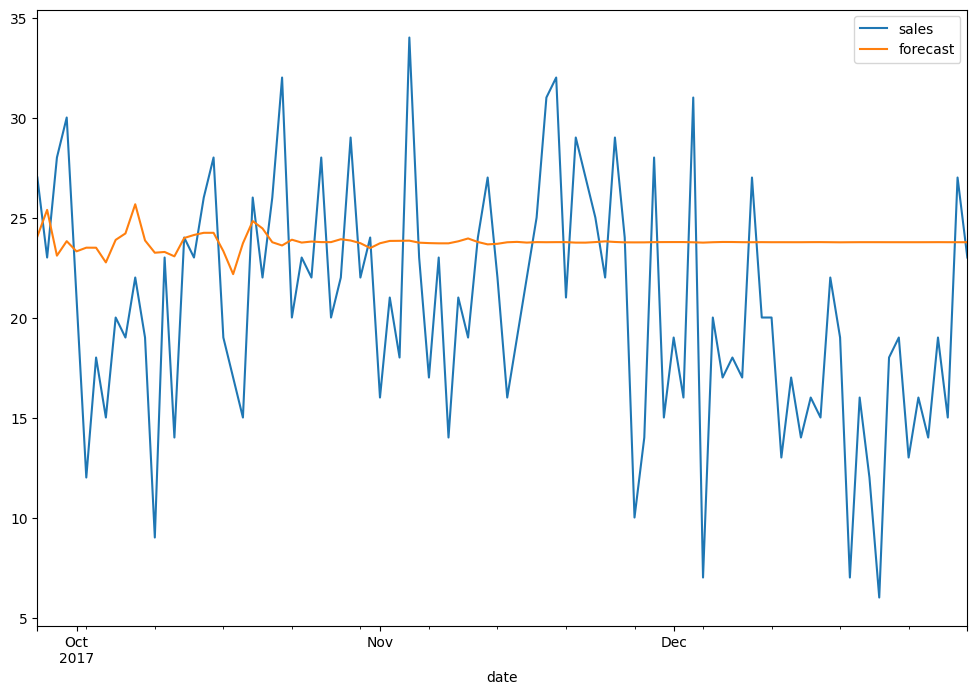

In [53]:
# Predictions
start_index = 1730
end_index = 1826
train_df['forecast'] = sarimax_model_fit.predict(start = start_index, end= end_index, dynamic= True)  
train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

In [54]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")
smape_kun(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])

MAPE: 37.12 % 
SMAPE: 27.25 %


In [55]:
rmse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'], squared=False)
print('RMSE: %.2f' % rmse)

# calculate MSE
mse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MSE: %.2f' % mse)

# calculate MAE
mae = mean_absolute_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MAE: %.2f' % mae)

RMSE: 6.71
MSE: 45.05
MAE: 5.50


## Forecasting next 3 months of data using tuned models

#### For tuned ARIMA

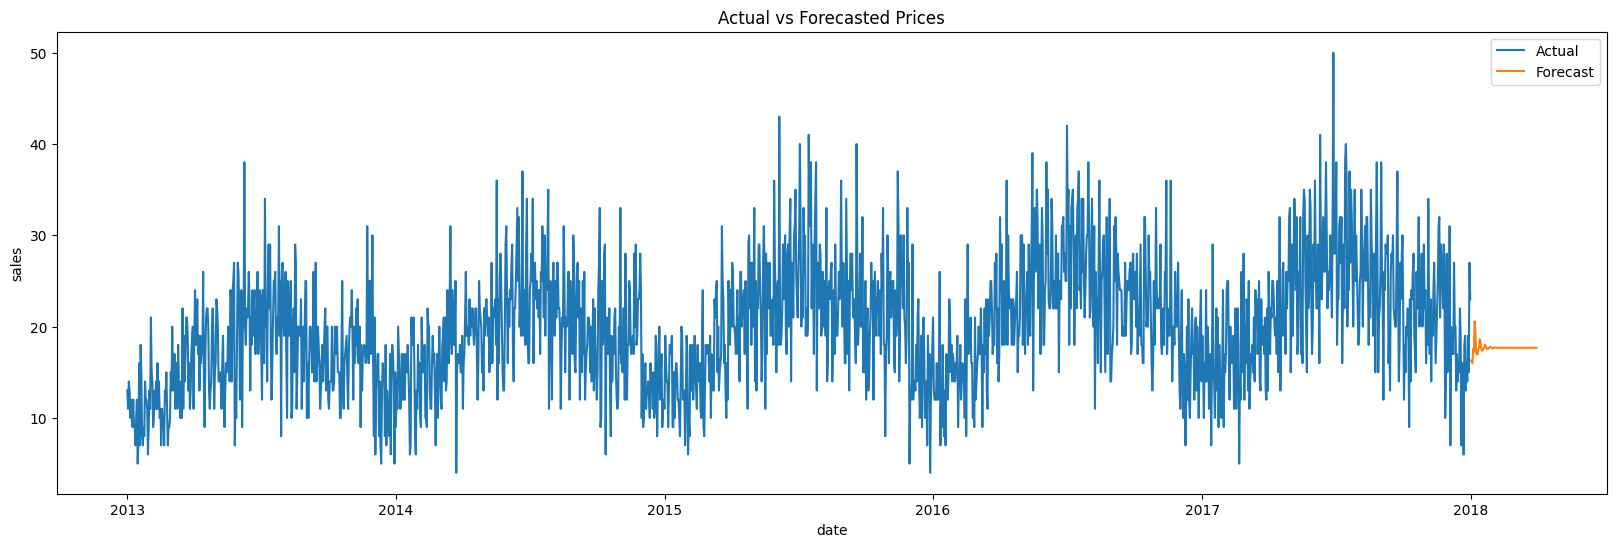

In [56]:
# Forecast prices for next 3 months
forecast = arima_model_fit.forecast(steps=3*30)

# Concatenate train data and forecast
combined_data = pd.concat([train_df, forecast])

# Plot actual vs forecasted prices
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(combined_data.index, combined_data["sales"], label="Actual")
ax.plot(forecast.index, forecast, label="Forecast")
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Actual vs Forecasted Prices")
ax.legend()
plt.show()

#### For tuned SARIMAX model

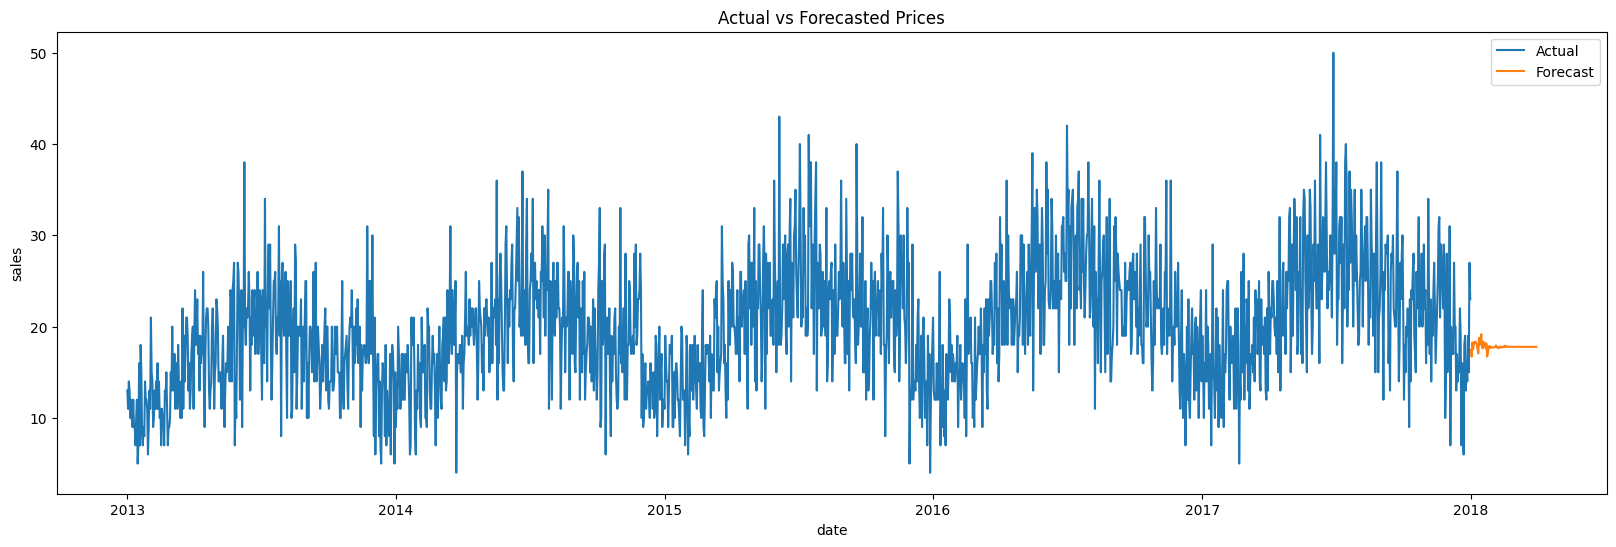

In [57]:
# Forecast prices for next 3 months
forecast = sarimax_model_fit.forecast(steps=3*30)

# Concatenate train data and forecast
combined_data = pd.concat([train_df, forecast])

# Plot actual vs forecasted prices
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(combined_data.index, combined_data["sales"], label="Actual")
ax.plot(forecast.index, forecast, label="Forecast")
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Actual vs Forecasted Prices")
ax.legend()
plt.show()